# Исследование объявлений о продаже квартир

Необходимо провести исследование данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель исследования** - научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. Необходимо установить следующие параметры:
1. Изучить время, за которое происходит продажа квартир, найти среднее и медианное время продажи квартир, установить значения при которых время продажи может считаться необычно долгим и очень быстрым.
2. Определить фактор, оказывающие наибольшее влияние на стоимость квартир, изучить зависимость цен от количества квадратных метров в квартире, числа комнат, этажности, удалённости от центра, а также от даты размещения объявлений.
3. Изучить предложения квартир и выяснить, какая область входит в центр Санкт-Петербурга.
4. Выделить сегмент квартир в центре и проанализировать эту территорию с изучением таких параметров как: площадь, цена, число комнат, высота потолков, а также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Данные сервиса выгружены в файл `real_estate_data.csv`. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Исследование будет проведено в пять этапов:
1. Обзор и изучение данных.
2. Предобработка данных.
3. Промежуточные расчёты и добавление их результатов в таблицу.
4. Исследовательский анализ данных.
5. Установление параметров, от которых зависит рыночная стоимость объектов недвижимости и формулирование выводов.

## Обзор данных

In [1]:
# импорт необходимых библиотек
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# чтение файла, сохранение данных в df 
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# просмотр первых 5 строк таблицы df
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
# просмотр общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 23699 строк и 22 столбца с различными типами данных: *int64*, *float64* и *object*. Согласно документации к данным:
* `total_images` — число фотографий квартиры в объявлении;
* `last_price` —  цена на момент снятия с публикации;  
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` — дата публикации объявления;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков (м);
* `floors_total` — общее количество этажей в доме;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `floor` — этаж, на котором расположена квартира;
* `is_apartment` — является ли квартира апартаментами (булев тип);
* `studio` — является ли квартира студией (булев тип);
* `open_plan` — есть ли свободная планировка (булев тип);
* `kitchen_area` —  площадь кухни в квадратных метрах (м²);  
* `balcony` — число балконов;
* `locality_name` —  название населённого пункта;
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` —  расстояние до ближайшего водоёма (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

### Выводы по полученным данным

В названиях колонок `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` обнаружено нарушение стиля.

Количество значений в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition ` отличается от общего, что говорит о множественных пропущенных значениях.

Чтобы в исследовательском анализе данных получить достоверные выводы, необходимо разобраться и по возможности устранить проблемы в данных.

## Предобработка данных

### Переименовение столбцов

Переименуем колонки, в которых на этапе изучения данных были обнаружены нарушения стиля.

In [3]:
# переименование столбцов
df = df.rename(columns={
    'cityCenters_nearest': 'city_сenters_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
})

Проверка результата переименования колонок.

In [4]:
# проверка результатов - перечень названий столбцов
display(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Заполнение пропусков, исправление аномальных значений

Произведем подсчёт количества пропущенных значений в данных методами библиотеки `pandas`.

In [5]:
# подсчёт пропусков
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Большая часть данных имеет пропуски. Пропуски содержатся в следующих данных:
* `ceiling_height` — высота потолков;
* `floors_total` — общее количество этажей в доме;
* `living_area` — жилая площадь;
* `is_apartment` — является ли квартира апартаментами;
* `kitchen_area` —  площадь кухни;  
* `balcony` — число балконов;
* `locality_name` —  название населённого пункта;
* `airports_nearest` — расстояние до ближайшего аэропорта;
* `city_сenters_nearest` — расстояние до центра города;
* `parks_around_3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка;
* `ponds_around_3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` —  расстояние до ближайшего водоёма;
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Посмотрим как распределены пропуски по отношению ко всем данным.

In [6]:
# подсчёт доли пропусков по отношению ко всем данным
display(round(df.isna().sum() / df.shape[0], 2))

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.39
floors_total            0.00
living_area             0.08
floor                   0.00
is_apartment            0.88
studio                  0.00
open_plan               0.00
kitchen_area            0.10
balcony                 0.49
locality_name           0.00
airports_nearest        0.23
city_сenters_nearest    0.23
parks_around_3000       0.23
parks_nearest           0.66
ponds_around_3000       0.23
ponds_nearest           0.62
days_exposition         0.13
dtype: float64

Проанализировав данные о пропусках можно сразу выделить два столбца `is_apartment` и `balcony`, в которых пропущено `88%` и `49%` данных соотвественно. Из-за того, что такой вид недвижимости как *аппартаменты* встречается очень редко, можно предположить, что все пропуски по данному столбцу можно разметить как `не аппартаменты`. А все пропуски по столбцу `balcony` логично заменить на `0`, так как скорее всего, человек не указал количество балконов потому, что их у него и нет.

Перед заполнением пропусков в данных столбцах посмотрим на то, какие данные в них уже присуствуют и как они распределены.

In [7]:
# просмотр значений столбца is_apartment
display(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
# просмотр значений столбца balcony
display(df['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Заменим пропущенные значения в столбце `is_apartment` на значение булевого типа `False`, а пропущенные значения в колонке `balcony` значением `0`.

In [9]:
# замена пропущенных значений столбца is_apartment
df['is_apartment'] = df['is_apartment'].fillna(False)

In [10]:
# замена пропущенных значений столбца is_apartment
df['balcony'] = df['balcony'].fillna(0)

Проверим произведённые изменения.

In [11]:
# повторный подсчёт пропусков
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

От пропусков в `is_apartment` и `balcony` успешно избавились. 

Далее рассмотрим пропуски в разрезе двух групп. Первая группа - это пропуски, полученные автоматически на основе обращения к картографическим данным. К ним относятся:
* `airports_nearest` — расстояние до ближайшего аэропорта;
* `city_сenters_nearest` — расстояние до центра города;
* `parks_around_3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка;
* `ponds_around_3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` —  расстояние до ближайшего водоёма.

Так как значения количества пропусков в этих данных очень похожи, то можно предположить, что это системная ошибка, которая возникла из-за того, что пользователь сервиса Яндекс.Недвижимость предоставил данные о местоположении объекта недвижимости, которые не позволили достоверно спозиционировать его на картографических данных. Соответственно, корректно исправить эти данные не представляется возможным. Поэтому, оставим их как есть.

Отдельно стоит выделить пропуски в столбце `days_exposition`. Они также получены автоматически, но в отличие от рассмотренной выше группы, причина их появления заключается, скорее всего, в том, что на момент выгрузки данных эти объявления были еще активны и по ним, соотвественно, не был определен показатель количества дней размещения объявления до момента его снятия. Поэтому, логично также оставить эти данные как есть.

Вторая группа - это пропуски в данных, которые могли возникнуть по причине непредоставления пользователем сервиса Яндекс.Недвижимость соответствующих данных. Это такие данные как:
* `ceiling_height` — высота потолков;
* `floors_total` — общее количество этажей в доме;
* `living_area` — жилая площадь;
* `kitchen_area` —  площадь кухни;
* `locality_name` —  название населённого пункта.

По высоте потолков пропуски в `39%` данных, по общему количеству этажей менее `1%`, по жилой площади около `8%`, по площади кухни у `10%` данных и по название населённого пункта количество пропусков также незначительно и составляет менее `1%`.

Перед принятием решения об устранении пропусков в остальных четырёх столбцах посмотрим на основные описательные статистики по ним.

In [12]:
# просмотр описательных статистик для ceiling_height, floors_total, living_area, kitchen_area
display(df[['ceiling_height', 'floors_total', 'living_area', 'kitchen_area']].describe())

,ceiling_height,floors_total,living_area,kitchen_area
count,14504.000000,23613.000000,21796.000000,21421.000000
mean,2.771499,10.673824,34.457852,10.569807
std,1.261056,6.597173,22.030445,5.905438
min,1.000000,1.000000,2.000000,1.300000
25%,2.520000,5.000000,18.600000,7.000000
50%,2.650000,9.000000,30.000000,9.100000
75%,2.800000,16.000000,42.300000,12.000000
max,100.000000,60.000000,409.700000,112.000000


Из полученной таблицы видно, что у показателя высоты потолков `ceiling_height` кроме большого количества пропущенных значений, присуствуют проблемы другого характера, заключающиеся в аномально малых значениях высоты потолков в `1` метр и аномально больших в `100` метров. Посмотрим на их общее количество относительно значений минимального показателя в `2.5` метра, определенного в СНиПах и максимального в `3.5` метра, который был характерен для так называемых многоквартирных домов "сталинок".

In [13]:
# количество значений с аномально малой высотой потолков
min_ceiling_height_count = df.query('ceiling_height < 2.5')['ceiling_height'].count()
display(min_ceiling_height_count)

73

In [14]:
# количество значений с аномально большой высотой потолков
max_ceiling_height_count = df.query('ceiling_height > 3.5')['ceiling_height'].count()
display(max_ceiling_height_count)

304

Определим какую долю аномальные значения составляют в общем объёме данных и в непропущенных значениях.

In [15]:
# определим доли аномальных значений
round((min_ceiling_height_count + max_ceiling_height_count) / df.shape[0] , 3), \
round((min_ceiling_height_count + max_ceiling_height_count) / df['ceiling_height'].notna().sum() , 3)

(0.016, 0.026)

Относительно общего объема данных количество аномальных значений для высоты потолков составляет `1.6%`, а относительно непропущенных значений `2.6%`.

#### Исправление данных по высоте потолков

Заполнить пропущенные и заменить аномальные значения для высоты потолков в столбце `ceiling_height` можно медианными значениями по корректным данным в зависимости от категориального признака `locality_name` - населённого пункта.

In [16]:
# заполнение пропусков по значениям высоты потолков в зависимости от населённого пункта
indexes = df.loc[df['ceiling_height'].isna() == True].index

df.loc[indexes, 'ceiling_height'] = df.groupby(['locality_name'])['ceiling_height'].transform('median').loc[indexes]

Замена аномальных значений в столбце `ceiling_height` на медианные в зависимости от категориального признака `locality_name` - населённого пункта.

In [17]:
# сохраним индексы аномальных значений в переменную для улучшения читаемости кода
indexes = df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 3.5)].index

# перезапись аномальных значений высоты потолков на медианные в зависимости от населённого пункта
df.loc[indexes, 'ceiling_height'] = df.groupby(['locality_name'])['ceiling_height'].transform('median').loc[indexes]

Проверим остались ли ещё пропуски и аномальные значения в данных по высоте потолков.

In [18]:
# подсчитаем количество пропусков и аномальных значений для значений высоты потолков
df['ceiling_height'].isna().sum(), df.query('ceiling_height > 3.5')['ceiling_height'].count()

(158, 22)

Осталось `158` пропущенных значений и `22` аномальных, что может говорить о том, что для данных населённых пунктов не было найдено значений, по которым можно было рассчитать медианное значение в их группах. Поэтому, заменим оставшиеся значения медианными по всей выборке.

In [19]:
# расчёт медианного значения
ceiling_height_median = df['ceiling_height'].median()

# замена пропусков на медианные значения всей выборки
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

# замена аномальных значений на медианные для всей выборки
df.loc[df.loc[df['ceiling_height'] > 3.5].index, 'ceiling_height'] = ceiling_height_median

#### Исправление данных по количеству этажей

Следующий показатель, с пропусками которого предстоит поработать - это `floors_total`. Минимальная этажность объектов недвижимости согласно сводной таблице описательных статистик равна 1, что соотвествует достоверным данным. А вот максимальная высота объекта недвижимости в `60` этажей выглядит аномальной, так как самое большое количество этажей у жилой недвижимости в Санкт-Петербурге в ЖК «Князь Александр Невский» и оно составляет `37` этажей.

По этой причине объектов недвижимости в таблице с количеством этажей более `37` быть не должно. Посмотрим на количество аномальных значий по данному показателю.

In [20]:
# количество значений с аномально большой этажностью
display(df.query('floors_total > 37')['floors_total'].count())

2

Всего `2` объекта недвижимости в данных содержат аномально большие данные по количеству этажей.
Количество пропущенных данных по этажности объектов недвижимости составляет `86` единиц.

Заполним данные медианными значениями. Здесь как раз будет уместно произвести подсчёт медианных значений в зависимости от населённого пункта, так как логика подсказывает, что медианное значение этого показателя будет зависеть от населённого пункта. Поэтому, заполним пропущенные и аномальные значения медианными с дифференцированием по населённому пункту.

Для этого создадим вспомогательный датафрейм, в который поместим соотвествия медианных значений названию населенного пункта.

In [21]:
# создание датафрейма с соотвествием этажности зданий определенному населённому пункту
floor_by_locality = df.query('floors_total < 38').groupby('locality_name').agg({'floors_total': 'median'})

# перевод в целые значения количества этажей если в результате вычисления медианы были получены вещественные числа
floor_by_locality['floors_total'] = floor_by_locality['floors_total'].astype('int')

# переименование столбца floors_total во floors_total_median
floor_by_locality = floor_by_locality.rename(columns={
    'floors_total': 'floors_total_median'
})

display(floor_by_locality)

,floors_total_median
locality_name,
Бокситогорск,5
Волосово,5
Волхов,5
Всеволожск,9
Выборг,5
...,...
село Путилово,4
село Рождествено,3
село Русско-Высоцкое,5


Замена аномальных значений в столбце `floors_total` на медианные в зависимости от населенного пункта.

In [22]:
# перезапись аномальных значений количества этажей зданий на медианные в зависимости от населённого пункта
# определим индексы данных для перезаписи
indexes = df.loc[(df['floors_total'].isna() == True) & (df['locality_name'].isna() == False)].index

# создадим из датафрейма floor_by_locality словарь для функции map()
floor_by_locality_dict = floor_by_locality.to_dict()['floors_total_median']

# замена аномальных значений в столбце floors_total на медианные в зависимости от населённого пункта с помощью map()
df.loc[indexes, 'floors_total'] = df.loc[indexes, 'locality_name'].map(floor_by_locality_dict)

Проверим количество пропущенных значений в столбце `floors_total` после произведённых замен.

In [23]:
# проверка пропусков в столбце floors_total
display(df['floors_total'].isna().sum())

1

Осталось `1` пропущенное значение из-за того, что на предыдущей замене у одной из строк был пропуск в названии населённого пункта `locality_name`. Его заменим обычным медианным значением. Для этого найдем медианное значение и сохраним в переменнуую.

In [24]:
# определение медианного значения этажности по корректным данным
floors_total_median = df.query('floors_total < 38')['floors_total'].median()
display(floors_total_median)

9.0

Замена одного оставшегося пропуска и двух аномальных значений в данных по количеству этажей в доме `floors_total`.

In [25]:
# заполнение оставшегося пропуска по значению количества этажей в доме на медианное
df['floors_total'] = df['floors_total'].fillna(floors_total_median)

# перезапись аномальных значений количества этажей в доме на медианные
df.loc[df.loc[df['floors_total'] > 37].index, 'floors_total'] = floors_total_median

#### Исправление данных по жилой площади и площади кухни

Среди данных, предоставленных пользователем, остались два столбца с необработанными пропусками: `living_area` — жилая площадь и `kitchen_area` —  площадь кухни. Отберём среди признаков данные с которыми эти значения могут коррелировать и посмотрим на коэффициент корреляции Пирсона для отобранных пар столбцов. Логично предположить, что корреляция может наблюдаться со следующими данными `total_area` - общей площадью, `last_price` - ценой на момент снятия с публикации и `room` - числом комнат.

In [26]:
# матрица корреляции для жилой площади с отобранными показателями
display(df[['living_area', 'total_area', 'last_price', 'rooms']].corr())

,living_area,total_area,last_price,rooms
living_area,1.000000,0.939537,0.566492,0.845977
total_area,0.939537,1.000000,0.653675,0.758344
last_price,0.566492,0.653675,1.000000,0.363343
rooms,0.845977,0.758344,0.363343,1.000000


In [27]:
# матрица корреляции для площади кухни с отобранными показателями
display(df[['kitchen_area', 'total_area', 'last_price', 'rooms']].corr())

,kitchen_area,total_area,last_price,rooms
kitchen_area,1.000000,0.609121,0.519869,0.269945
total_area,0.609121,1.000000,0.653675,0.758344
last_price,0.519869,0.653675,1.000000,0.363343
rooms,0.269945,0.758344,0.363343,1.000000


Полученные значения выглядят логично. Практически достигает единицы коэффициент корреляции, равный `0.94`, между общей и жилой площадями. Существенно ниже коэффициент корреляции между общей площадью и площадью кухни и он равен `0.61`. Последняя цена продажи коррелирует с жилой площащью и площадью кухни примерно одинаково и коэффициент корреляции между ними составляет `0.57` и `0.52`, соотвественно. Коэффициент корреляции между жилой площадью и количеством комнат также значителен и составляет `0.85`, в отличии от гораздо более низкого значения коэффициента корреляции  в `0.27` между площадью кухни и числом комнат. Подобное выраженное отличие вполне объяснимо тем, что из общего количества комнат и их суммарной площади как раз и складывается показатель жилой площади, а на площадь кухни если этот показатель если и влияет, то очень опосредованно, что и подтверждают полученные значения.

Исходя из полученных данных, можно заполнить пропуски в `living_area`и `kitchen_area`, учитывая их выраженную корреляцию с `total_area`. Чтобы заполнение было более достоверным, категоризируем признак `total_area` - площадь квартиры, выделив в нём несколько групп, найдем медианные значения площадей `living_area`и `kitchen_area` для каждой из групп и будем использовать их для заполнения пропусков, исходя из соотвествия объекта недвижимости той или иной группе.

Перед созданием групп для признака `total_area` посмотрим на максимальные и минимальные значения, которые принимает данный признак.

In [28]:
# отображение минимального и максимального значений признака total_area
df['total_area'].min(), df['total_area'].max()

(12.0, 900.0)

Общая площадь объектов недвижимости в наших данных находится в пределах от 12 до 900 м². Выделим следующие категории для данного показателя:
* `Н` — для объектов недвижимости с общей площадью в диапазоне 0.00-50.00 м²;
* `G` — для объектов недвижимости с общей площадью в диапазоне 50.01-100.00 м²;
* `F` — для объектов недвижимости с общей площадью в диапазоне 100.01-150.00 м²;
* `E` — для объектов недвижимости с общей площадью в диапазоне 150.01-200.00 м²;
* `D` — для объектов недвижимости с общей площадью в диапазоне 200.01-350.00 м²;
* `C` — для объектов недвижимости с общей площадью в диапазоне 350.01-500.00 м²;
* `B` — для объектов недвижимости с общей площадью в диапазоне 500.01-700.00 м²;
* `A` — для объектов недвижимости с общей площадью свыше 700.01 м².

Создадим функцию, с помощью которой выполним категоризацию данных по признаку общей площади объекта недвижимости.

In [29]:
# функция для категоризации общей площади объектов недвижимости

def get_area_group(row):
    """
    Возвращает метку для общей площади объектов недвижимости, используя правила:
    - метка 'Н' — для объектов недвижимости с общей площадью в диапазоне 0.00-50.00 м²
    - метка 'G' — для объектов недвижимости с общей площадью в диапазоне 50.01-100.00 м²
    - метка 'F' — для объектов недвижимости с общей площадью в диапазоне 100.01-150.00 м²
    - метка 'E' — для объектов недвижимости с общей площадью в диапазоне 150.01-200.00 м²
    - метка 'D' — для объектов недвижимости с общей площадью в диапазоне 200.01-350.00 м²
    - метка 'C' — для объектов недвижимости с общей площадью в диапазоне 350.01-500.00 м²
    - метка 'B' — для объектов недвижимости с общей площадью в диапазоне 500.01-700.00 м²
    - метка 'A' — для объектов недвижимости с общей площадью свыше 700.01 м²
    """
    
    total_area = row['total_area']

    if 0 < total_area <= 50:
        return 'H'
    elif 50 < total_area <= 100:
        return 'G'
    elif 100 < total_area <= 150:
        return 'F'
    elif 150 < total_area <= 200:
        return 'E'
    elif 200 < total_area <= 350:
        return 'D'
    elif 350 < total_area <= 500:
        return 'C'
    elif 500 < total_area <= 700:
        return 'B'
    else:
        return 'A'

In [30]:
# добавление категориальных данных по общей площади объектов недвижимости
df['total_area_category'] = df.apply(get_area_group, axis=1)

Создадим вспомогательный датафрейм, в котором будут расчитаны медианные значения `living_area` и `kitchen_area` в зависимости от `total_area_category`.

In [31]:
# создание датафрейма с соответствием жилой площади и площади кухни категориальному признаку общей площади
area_by_total = df.groupby('total_area_category').agg({'living_area': 'median', 'kitchen_area': 'median'})


# переименование столбца living_area и kitchen_area в living_area_median и kitchen_area_median соотвественно
area_by_total = area_by_total.rename(columns={
    'living_area': 'living_area_median',
    'kitchen_area': 'kitchen_area_median'
})

display(area_by_total)

,living_area_median,kitchen_area_median
total_area_category,,
A,409.7,112.000
B,322.3,52.750
C,239.4,36.025
D,151.8,25.300
E,99.1,19.500
F,68.4,15.600
G,39.6,10.000
H,18.4,8.000


Замена пропущенных значений в столбцах `living_area` и `kitchen_area` в зависимости от категории `total_area_category`.

In [32]:
# определим индексы данных для перезаписи пропущенных значений в жилой площади
indexes_living = df.loc[df['living_area'].isna() == True].index

# определим индексы данных для перезаписи пропущенных значений в площади кухни
indexes_kitchen = df.loc[df['kitchen_area'].isna() == True].index

# создадим из датафрейма area_by_total словарь медианных значений жилой площади для функции map()
living_area_by_total_dict = area_by_total.to_dict()['living_area_median']
display(living_area_by_total_dict)

# создадим из датафрейма area_by_total словарь медианных значений площади кухни для функции map()
kitchen_area_by_total_dict = area_by_total.to_dict()['kitchen_area_median']
display(kitchen_area_by_total_dict)

# замена аномальных значений в столбце living_area на медианные в зависимости от категории общей площади
# с помощью функции map()
df.loc[indexes_living, 'living_area'] = df.loc[indexes_living, 'total_area_category'].map(living_area_by_total_dict)

# замена аномальных значений в столбце kitchen_area на медианные в зависимости от категории общей площади
# с помощью функции map()
df.loc[indexes_kitchen, 'kitchen_area'] = df.loc[indexes_kitchen, 'total_area_category'].map(kitchen_area_by_total_dict)

{'A': 409.7,
 'B': 322.3,
 'C': 239.4,
 'D': 151.8,
 'E': 99.1,
 'F': 68.4,
 'G': 39.6,
 'H': 18.4}

{'A': 112.0,
 'B': 52.75,
 'C': 36.025,
 'D': 25.3,
 'E': 19.5,
 'F': 15.6,
 'G': 10.0,
 'H': 8.0}

Произведём проверку корректности выполненных замен. Для этого подсчитаем количество данных в датафрейме, равных значениям каждого словаря.

In [33]:
# получение значений из словаря жилой площади
living_area_by_total_values = living_area_by_total_dict.values()

# начальное значение счётчика для значений жилой площади
sum_living_values = 0

# подсчёт суммированием всех значений жилой площади из датафрейма, равных значениям из словаря
for value in living_area_by_total_values:
    sum_living_values += df.query('living_area == @value')['living_area'].count()
    
display(sum_living_values)

# получение значений из словаря жилой площади
kitchen_area_by_total_values = kitchen_area_by_total_dict.values()

# начальное значение счётчика для значений площади кухни
sum_kitchen_values = 0

# подсчёт суммированием всех значений площади кухни из датафрейма, равных значениям из словаря
for value in kitchen_area_by_total_values:
    sum_kitchen_values += df.query('kitchen_area == @value')['kitchen_area'].count()
    
display(sum_kitchen_values)

1977

4694

Получены значения `1977` для общей площади `living_area` и `4694` для площади кухни `kitchen_area`. Пропущенных значений в данных столбцах у нас было `1903` и `2278`, соотвественно. Большее количество полученных значений можно объяснить тем, что некоторые значения уже имеющиеся в датафрейме, могли совпасть со значениями, которые были подставлены из словарей. И чем меньше диапазон допустимых значений, тем подобных совпадений может быть больше, что и демонстрирует гораздо большее количество совпадений для показателя площади кухни `kitchen_area`.

#### Исправление данных о цене квартир

Проверим на аномальные значения также другие важные для будущего исследования данные, которые будут непосредственно в нём участвовать: цену на момент снятия с публикации `last_price`, число комнат `rooms` и период размещения объявления от публикации до снятия `days_exposition`.

In [34]:
# просмотр описательных статистик для last_price и days_exposition
display(df[['last_price', 'rooms', 'days_exposition']].describe())

,last_price,rooms,days_exposition
count,2.369900e+04,23699.000000,20518.000000
mean,6.541549e+06,2.070636,180.888634
std,1.088701e+07,1.078405,219.727988
min,1.219000e+04,0.000000,1.000000
25%,3.400000e+06,1.000000,45.000000
50%,4.650000e+06,2.000000,95.000000
75%,6.800000e+06,3.000000,232.000000
max,7.630000e+08,19.000000,1580.000000


Данные по периоду публикации явных аномалий не содержат, а в цене объектов недвижимости по отношению к другим данным аномально низким выглядит минимальное значение, равное `12190`. Проверим какое количество объектов недвижимости в данных имеет показатель стоимости объектов недвижимости менее `500000`.

Также присуствуют аномалии в данных по количеству комнат, равному `0`, что является ошибкой. Скорее всего эти данные не были заполнены пользователями или внесены ошибочно.

Обработаем аномальные значения в указанных данных.

In [35]:
# количество значений со стоимостью, выглядящей как аномально низкая
display(df.query('last_price < 500000')['last_price'].count())

14

14 значений можно просмотреть визуально, чтобы принять решение о том, насколько эти данные достоверны и что с ними можно сделать.

In [36]:
# предпросмотр данных с низкими показателями стоимости квартир
display(df.query('last_price < 500000'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_category
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.615,1.0,23.0,1,False,...,0.0,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0,H
6859,6,490000.0,40.0,2017-12-11T00:00:00,1,2.700,5.0,18.4,3,False,...,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,43.0,H
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.750,25.0,32.0,25,False,...,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,F
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.700,5.0,30.3,3,False,...,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0,H
10782,3,490000.0,29.1,2016-05-05T00:00:00,1,2.500,5.0,17.0,5,False,...,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,719.0,H
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.700,3.0,39.6,3,False,...,0.0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0,G
16032,8,480000.0,32.0,2019-01-06T00:00:00,1,2.500,2.0,16.0,1,False,...,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,83.0,H
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.650,2.0,18.4,1,False,...,0.0,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0,H
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.700,5.0,18.4,1,False,...,0.0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0,H
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.500,2.0,16.0,1,False,...,0.0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H


13 объектов недвижимости из полученной таблицы имеют стоимость немного меньше `500000`, что с учётом их локации и низкой общей площади может соотвествовать действительности, а значение стоимости, равное `12190`, соответствующее строке с индексом 8793 явно ошибочно, так как квартира находится в Санкт-Петербурге и имеет большую площадь. Вероятно, что её стоимость была указана в тысячах и поэтому, чтобы скорретировать данное значение домножим его на 1000.

In [37]:
# корректировка аномально низкого показателя по стоимости квартиры
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price'] * 1000

#### Исправление данных по количеству комнат

Определим количеcтво данных с квартирами, у которых количество комнат `rooms = 0`.

In [38]:
# количество значений с нулевым количеством комнат
display(df.query('rooms == 0')['rooms'].count())

197

197 объектов. Достаточно много, поэтому простой визуальный анализ табличных данных может быть затруднителен. Ограничимся просмотром описательных статистик для данной подвыборки.

In [39]:
# просмотр описательных статистик для подвыборки из данных с количеством комнат, равным 0
display(df.query('rooms == 0')['total_area'].describe())

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

Из описательных статистик по средним и медианным значениям видно, что большинство квартир имеют небольшую площадь. Но, судя по максимальному значению, есть также и квартиры из групп повышенных площадей. Можно предположить, что объявления с `rooms = 0` относятся к классу аппартаментов. Поэтому, изменим значение `is_apartment` для них на `True`.

Замена значений в столбце `is_apartment` на `True` для квартир с числом комнат `rooms = 0`.

In [40]:
# определим индексы данных для перезаписи объектов с нулевым количеством комнат
indexes_rooms = df.loc[df['rooms'] == 0].index


# замена значений в столбце is_apartment на True для объектов с количеством комнат, равным 0
df.loc[indexes_rooms, 'is_apartment'] = True

Проверим получившееся распределение объектов в таблице по признаку `is_apartment`.

In [41]:
# просмотр значений столбца is_apartment
df['is_apartment'].value_counts()

False    23452
True       247
Name: is_apartment, dtype: int64

Количество объектов, относящихся к классу апартаментов, увеличилось с начальных `50` до `247` и составило около `1%` от всех квартир.

In [42]:
# проверка описательных статистик после замены нулевых значений медианными в зависимости от категории квартиры по площади
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нулевых значений по количеству комнат больше нет.

С пропусками осталась группа, полученная на основе картографических данных `airports_nearest`, `city_сenters_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`. Ранее было отмечено, что корректно исправить пропущенные значения в указанных данных не представлется возможным из-за того, что указанные пользователем данные о местоположении объекта недвижимости содержат неточности, которые не позволяют в автоматическом режиме спозиционировать положение объекта на картографических данных.

`3181` пропуск остался для показателя периода размещения объявления в днях, что может указывать на то, что на момент выгрузки данных эти объявления не были еще закрыты и подвергать их корректировке было бы также неверно.

#### Исправление данных по названию населенного пункта

Пропуски в названии населённого пункта `locality_name` заполнить чем-то приближенным к достоверным данным не представляется возможным. А так как общее количество пропусков составляет всего `49` единиц, то единственное значение, которым было бы логично заменить пропуски - это `Неизвестно`.

In [43]:
# заполнение пропусков в стобце locality_name
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

#### Итоговый результат после исправлений

Посмотрим на итоговый результат, полученный после обработки пропущенных и аномальных значений.

In [44]:
# финальный подсчет пропусков
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
total_area_category         0
dtype: int64

На данном этапе были устранены аномальные значения и заполнены пропуски там, где это было возможно. Переходим к изменению типов данных.

### Изменение типов данных

Проверим для каких данных необходимо провести изменение типа. Для этого еще раз обратимся к общей информации о данных.

In [45]:
# просмотр общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_сenters_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_300

Поверим если ли какая-либо информация в дополнительном знаке после запятой у столбца со стоимостью квартир `last_price`.

In [46]:
# проверка количества уникальных значений в знаке после запятой столбца last_price
display(df['last_price'].astype('str').str[-2:].value_counts())

.0    23699
Name: last_price, dtype: int64

Полученный результат говорит о том, что никакого добавочного смысла или информации знак после запятой в столбце со стоимостью квартир `last_price` в себе не несёт, а следовательно тип данных может быть преобразован к целым значениям.

In [47]:
# преобразование типа данных в столбце last_price к целым значениям
df['last_price'] = df['last_price'].astype('int64')

Количество этажей в доме `floors_total` и этаж, на котором расположены квартиры `floor` и количество балконов `balcony` всегда характеризуются целыми числами. Поэтому, приведём их к типу целочисленных значений.

In [48]:
# перебор названий столбцов в цикле и замена их типа данных
columns_to_change_type = ['floor', 'floors_total', 'balcony']

for column in columns_to_change_type:
    df[column] = df[column].astype('int64', errors='ignore')

Дату публикации `first_day_exposition` объявлений приведем к типу `datetime`, чтобы иметь возможность в дальнейшем использовать встроенные в pandas методы для работы с датами.

In [49]:
# преобразование типа данных в столбце first_day_exposition к типу данных datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Отобразим итоговый результат, полученный после предобработки данных.

In [50]:
# просмотр общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
city_сenters_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around_3

### Выводы по результатам предобработки данных

* В полученных данных обнаружены нарушения стиля заголовков столбцов таблицы, которые были исправлены переименованием.
* В данных обнаружены пропуски, которые разделены на две группы: полученные автоматически на основе обращения к картографическим данным и полученные из-за непредоставления пользователем соответствующих данных.
* Все пропуски в первой группе предположительно имели общую первопричину, заключающуюся в том, что не удалось автоматически по данным пользователя о местоположении квартиры спозиционировать её на картографических данных. Было принято решение оставить данные пропуски как есть.
* Вторую группу пропусков удалось заполнить в соответсвии со смыслом хранимых в данных информации:
    * пропущенные значения о принадлежности недвижимости к классу апартаментов в количестве `20924` в столбце `is_apartment` были заполнены булевым типом `False`;
    * пропущенные значения по количеству балконов в количестве `11519` в столбце `balcony` были заполнены `0`;
    * пропущенные значения по высоте потолков в количестве `9195` в столбце `ceiling_height` были заполнены медианным значением, рассчитанным по большей части значений в зависимости от населённого пункта;
    * пропущенные значения по жилой площади в количестве `1903` в столбце `living_area` и по площади кухни в количестве `2278` в столбце `kitchen_area` были заполнены медианными значениями, дифференцированными по категориям общей площади квартир, для чего были выделены 8 категорий общей площади, которые были сохранены в таблице в столбце `total_area_category`;
    * пропущенные значения по местоположению в количестве `49` в столбце `locality_name` были заполнены строкой `Неизвестно`;
    * квартиры с количеством комнат, равным `0` были отнесены к аппартаментам и значения в столбце `is_apartment` для них были заменены на `True`.
* Аналогичные методы использованы для изменения выявленных аномальных значений в столбцах `ceiling_height`, `floors_total`, `last_price` и `rooms`.
* Тип данных в столбцах `last_price`, `floor`, `floors_total`  и `balcony` были преобразованы к целочисленному типу `int64`, а в `first_day_exposition` к  `datetime64`.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу данные, которые могут быть полезными в последующем исследовательском анализе. Для этого рассчитаем и внесём в новые столбцы следующие данные:
* `цену квадратного метра`
* `день недели, месяц и год публикации объявления`
* `этаж квартиры с вариантами — первый, последний, другой`
* `соотношение жилой и общей площади`
* `отношение площади кухни к общей площади`

Рассчитаем цену квадратного метра объектов недвижимости из таблицы как отношение цены на момент снятия с публикации `last_price` к площади в квадратных метрах `total_area`. Полученное значение округлим до целого и добавим к таблице в новый столбец с названием `square_meter_price`.

In [51]:
# вычисление цены квадратного метра для объектов недвижимости
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype('int64')

Добавим в таблицу данные о дне недели, месяце и годе публикации объявления. Дату публикации возьмём из столбца `first_day_exposition` и добавим в таблицу новые столбцы `publish_weekday`, `publish_month` и `publish_year` для чего воспользуемся методами `dt.weekday`, `dt.month` и `dt.year` соотвественно.

In [52]:
# добавление в таблицу дня недели, месяца и года публикации объявлений
df['publish_weekday'] = df['first_day_exposition'].dt.weekday
df['publish_month'] = df['first_day_exposition'].dt.month
df['publish_year'] = df['first_day_exposition'].dt.year

Создадим категориальный признак для этажа квартиры `floor_cat`. Необходимые для его формирования данные в таблице находятся в столбцах `floor` - значении этажа, на котором находится квартира, и `floors_total` - общем количестве этажей в доме. Для присвоения каждому объекту недвижимости определенной категории создадим вспомогательную функцию *floor_category()* на вход которой будем подавать строки с данными из таблицы, а на выходе получать название категорий. Далее с помощью метода *apply()* применим созданную функцию ко всем строкам таблицы.

Так как на этапе предобработки данных в столбце `floors_total` было `86` пропущенных значений, которые были заполнены медианными значениями, чтобы получить корректные значения категорий, предварительно проверим нет ли строк в датафрейме у которых этаж, на котором находится квартира со значением в столбце `floor` превышает общее количество этажей в доме `floors_total`.

In [53]:
# проверка на превышение этажа квартиры общей этажности дома
display(df.loc[df['floor'] > df['floors_total']]['floor'].count())

33

Таких квартир нашлось `33`. Перед категоризацией эти данные необходимо исправить заменив этаж квартиры `floor` значением общего количества этажей в доме `floors_total`.

In [54]:
# сохраняем индексы проблемных значений
indexes = df.loc[df['floor'] > df['floors_total']].index

# корректировка ошибочных значений в этаже квартиры по их индексам
df.loc[indexes, 'floor'] = df.loc[indexes, 'floors_total']

Создадим функцию для категоризации данных по этажу квартир.

In [55]:
# вспомогательная функция для категоризации данных по этажу квартиры
def floor_category(row):
    """
    input: row - строка из датафрейма, содержащая информацию о квартире
    ouput: (object) - категория этажа квартиры
    Функция принимает на вход строку с данными,
    сравнивает этаж квартиры `floor` со значением общего количества этажей в доме `floors_total`
    и возвращает категорию:
    
    Категория:          Описание:
    первый              первый этаж в доме
    последний           последний этаж в доме
    другой              все остальные этажи
    """
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

Применим созданную функцию к таблице с помощью метода *apply()*.

In [56]:
# категоризация данных по этажу с помощью функции floor_category() и метода apply()
df['floor_cat'] = df.apply(floor_category, axis=1)

Определим отношение жилой площади `living_area` к общей площади квартиры `total_area`. Результат округлим до двух знаков после запятой и занесём в новый столбец `living_to_total`.

In [57]:
df['living_to_total'] = round(df['living_area'] / df['total_area'], 2)

Определим отношение площади кухни `kitchen_area` к общей площади квартиры `total_area`. Результат округлим до двух знаков после запятой и занесём в новый столбец `kitchen_to_total`.

In [58]:
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'], 2)

Посмотрим на итоговый вид таблицы перед исследовательским анализом данных.

In [59]:
# итоговый вид таблицы перед исследовательским анализом
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,square_meter_price,publish_weekday,publish_month,publish_year,floor_cat,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,F,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,NaN,81.0,H,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,574.0,558.0,G,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.70,14,99.1,9,False,...,234.0,424.0,E,408176,4,7,2015,другой,0.62,0.12
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,G,100000,1,6,2018,другой,0.32,0.41


Также посмотрим на описательные статистики по созданным данным.

In [60]:
# просмотр описательных статистик по созданным данным
display(df[['square_meter_price', 'publish_weekday', 'publish_month', 'publish_year',\
            'living_to_total', 'kitchen_to_total']].describe())

,square_meter_price,publish_weekday,publish_month,publish_year,living_to_total,kitchen_to_total
count,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.942592e+04,2.569307,6.400101,2017.367146,0.563839,0.188597
std,5.030274e+04,1.789082,3.491561,1.039771,0.107004,0.073009
min,7.962000e+03,0.000000,1.000000,2014.000000,0.020000,0.030000
25%,7.659900e+04,1.000000,3.000000,2017.000000,0.490000,0.130000
50%,9.500000e+04,3.000000,6.000000,2017.000000,0.570000,0.170000
75%,1.142560e+05,4.000000,10.000000,2018.000000,0.640000,0.230000
max,1.907500e+06,6.000000,12.000000,2019.000000,1.420000,0.790000


Судя по описательным статистикам, добавленные данные не содержат каких-либо аномалий.

### Выводы по добавлению расчётных данных

* Для удобства последующего анализа в таблицу были добавлены новые признаки: цена квадратного метра; день, месяц и год публикации объявления; соотношение жилой и общей площадей, а также отношение площади кухни к общей площади; категоризирован признак этажа квартиры.
* Пропущенных значений новые данные не добавили, так как их не содержали и исходные данные, на основании которых осуществлялись расчёты.
* По минимальному и максимальному году публикации объявлений можно сделать вывод, что в таблице представлены данные за период 2014-2019 гг., то есть за 5 лет.
* В столбце `publish_weekday` - дне недели публикации объявления наблюдается полный диапазон дней от значения `0`, соотвествующего понедельнику, и до значения `6`, соотвествующего воскресенью.
* В столбце `publish_month` по минимальному и мксимальным значениям также можно предположить наличие полного диапазона месяцев от `1` до `12`.

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

Изучим параметр общей площади квартир `total_area`. Для этого посмотрим на его основные описательные статистики и построим гистограмму для данного признака.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

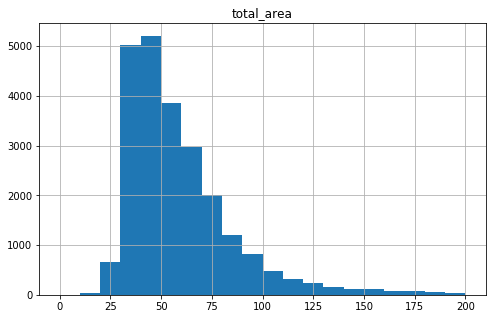

In [61]:
# вывод информации о распределении показателя `total_area` методом describe()
display(df['total_area'].describe())

# построение гистограммы распределении показателя `total_area` методом hist()
df.hist('total_area', bins=20, figsize=(8, 5), range=(0, 200));

* Распределение значений параметра общей площади квартир `total_area` близко к форме распределения Пуассона и не имеет аномальных пиков.
* Минимальный размер общей площади составляет `12 м²` и вполне может быть правдоподобным значением, когда продается комната в коммунальной квартире или общежитии.
* Максимальный размер общей площади составляет `900 м²`, что также является правдоподобным значением для элитной недвижимости.
* Медианное значение `52.0` меньше среднего `60.3`, следовательно распределение данных смещено левее, что вполне объяснимо тем, что небольших квартир значительно больше, а большие по площади квартиры достаточно редки и образуют длинный правый хвост.

Изучим параметр цены квартир на момент снятия с публикации `last_price`. Для этого посмотрим на его основные описательные статистики и построим гистограмму для данного признака.

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

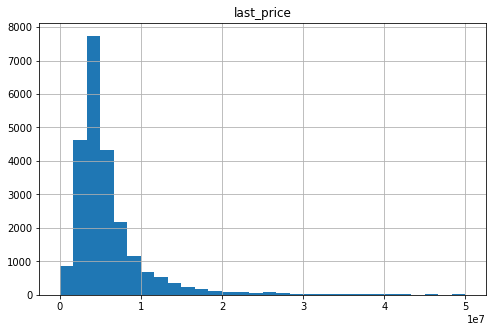

In [62]:
# вывод информации о распределении показателя `last_price` методом describe()
display(df['last_price'].describe())

# построение гистограммы распределении показателя `last_price` методом hist()
df.hist('last_price', bins=30, figsize=(8, 5), range=(0, 5*10**7));

* Распределение значений параметра цены квартир на момент снятия с публикации `last_price` также близко к форме распределения Пуассона.
* Минимальная цена объекта недвижимости на момент снятия объявления о продаже с публикации составляет `4.30e+05`, что вполне может соотвествовать стоимости комнаты.
* Максимальная цена объекта недвижимости в изучаемых данных составляет `7.63e+08` и она может также соотвествовать элитной недвижимости.
* Медианное значение `4.650000e+06` меньше среднего `6.542063e+06`, следовательно распределение данных также обладает левым смещением и длинным хвостом справа, который образуют редкие дорогие квартиры.

Рассмотрим параметр число комнат `rooms`. Для этого обратимся к его основные описательным статистикам и построим гистограмму для данного признака.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

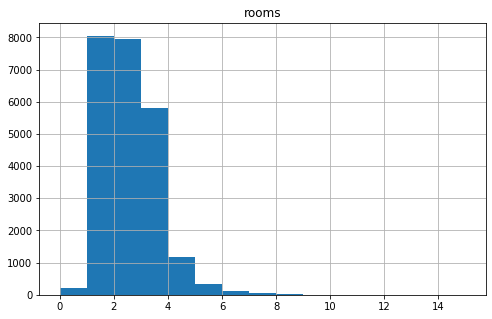

In [63]:
# вывод информации о распределении показателя `rooms` методом describe()
display(df['rooms'].describe())

# построение гистограммы распределении показателя `rooms` методом hist()
df.hist('rooms', bins=15, figsize=(8, 5), range=(0, 15));

* Распределение значений параметра числа комнат `rooms` также близко к форме распределения Пуассона.
* От аномальных значений данные были очищены на этапе предварительной обработки данных. По этой причине их здесь и не наблюдается. Минимальное количество комнат, как можно логично предположить, равно `1`.
* Максимальное количество комнат равно 19, что может соотвествовать обнаруженной ранее недвижимостью общей площадью 900 м².
* Медианное значение `2.0` практически совпадает со средним `2.08`, что говорит об отсуствии смещения данных, так как у большинства квартир количество комнат не превышает значения `3`.

Рассмотрим параметр высоты потолков `ceiling_height`. Для этого обратимся к его основные описательным статистикам и построим гистограмму распределения данного признака.

count    23699.000000
mean         2.690292
std          0.178060
min          2.450000
25%          2.550000
50%          2.700000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64

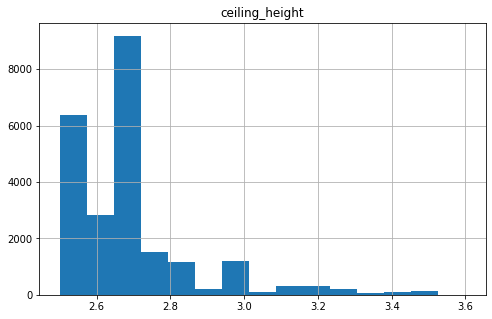

In [64]:
# вывод информации о распределении показателя `ceiling_height` методом describe()
display(df['ceiling_height'].describe())

# построение гистограммы распределении показателя `ceiling_height` методом hist()
df.hist('ceiling_height', bins=15, figsize=(8, 5), range=(2.5, 3.6));

* Распределение значений параметра числа высоты потолков `ceiling_height` можно соотнести с распределением Пуассона, но его портит медианный всплеск на значениях `2.7`, который получен несмотря на то, что была осуществлена попытка заполнения пропусков в зависимости от населенного пункта `locality_name`.
* Также присуствует менее выраженный всплеск на значениях `3.0` с предшествующим ему провалом на значениях, равных `2.9`, что может говорить о том, что некоторая часть соотвествующих значений была округлена пользователями.
* Медианное значение `2.7` совпадает со средним `2.7`, что также с одной строны может быть обусловлено заполнением пропусков близкими значениями, а с другой стороны, малым разбросом значений, которые находятся в диапазоне `2,45-3,50` и естественным образом стремятся к стандартному значению данного показателя, принятому в строительстве и соотвествующему значению `2.7`.

### Изучение времени продажи квартиры

Время продажи квартир находится в переменной `days_exposition`. Определим характер распределения данного признака и его основные параметры.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

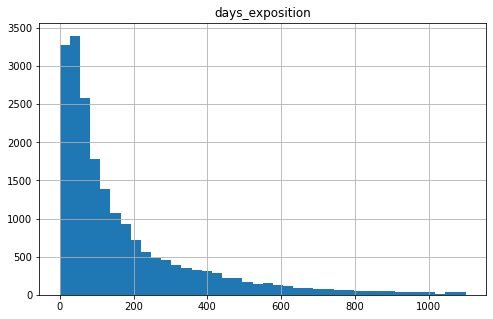

In [65]:
# вывод информации о распределении показателя `days_exposition` методом describe()
display(df['days_exposition'].describe())

# построение гистограммы распределении показателя `days_exposition` методом hist()
df.hist('days_exposition', bins=40, figsize=(8, 5), range=(0, 1100));

* Среднее значение двухкратно превышает медианное, что говорит о том, что данные имеют ярко выраженное смещение влево.
* Большинство квартир проданы за период `45-232` дня, но также есть квартиры, которые продавались очень долго, что образовало длинный хвост справа.
* Максимальное количество дней публикации составило `1580` дней, что соотвествует периоду более `4` лет.
* Минимальное количество дней публикации дней составило `1` день, что для объектов недвижимости является достаточно быстрым сроком. Появление подобных значений в данных, возможно, связано с тем, что причиной закрытия только что созданного объявления стала не продажа недвижимости, а какое-либо изменение обстоятельств у продавца, повлекшее за собой быстрое закрытие объявления.

Чтобы более точно определить, что можно считать очень быстрыми и необычно медленными продажами построим так называемый ящик с усами методом *boxplot()*.

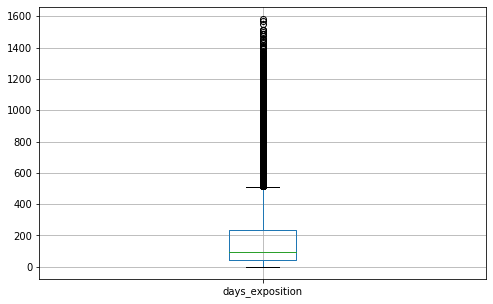

In [66]:
# построение ящика с умами для `days_exposition` методом boxplot()
df.boxplot('days_exposition', figsize=(8, 5));

Чтобы точно определить значение верхней границы, за которой будут находится выбросы, границу верхнего уса по формуле:

`75%Q + 1.5 * МКР`

In [67]:
# расчёт значения верхнего уса на графике
max_typical_exposition = df['days_exposition'].describe()['75%'] + \
(df['days_exposition'].describe()['75%'] - df['days_exposition'].describe()['25%']) * 1.5
display(int(max_typical_exposition))

512

* Нижний ус упирается в `1` - минимальное значение.
* Верхний ус, за которым будут находится выбросы, можно оценить немногим более `500` дней. Но, выбросов очень много, они сливаются в сплошную линию, которая становится более разреженной к области максимальных значений в `1580` дней. И все же значения, которые отсек верхний ус, очень редкие, так как медиана (зеленая линия) значительно смещена в сторону от верхнего уса.
* Время продажи квартир более `512` дней можно считать необычно долгим.

### Поиск и удаление редких и выбивающихся значений

Поиск и обработка редких и выбивающихся значений по таким данным как жилая площадь квартиры `living_area`, площадь кухни `kitchen_area`, цена на момент снятия с публикации `last_price` и высота потолков `ceiling_height` были проведены на этапе заполнения пропусков с исправлением аномальных значений.

### Определение факторов, влияющих на стоимость квартиры

Рассмотрим влияние на стоимость квартир `last_price` следующих показателей:
* площади квартир `total_area`;
* числа комнат `rooms`;
* удалённости от центра `city_сenters_nearest`;
* категории этажа, на котором расположены квартиры `floor_cat`;
* дня недели `publish_weekday`, месяца `publish_month` и года `publish_year` размещения объявлений.

#### Влияние площади квартир на их стоимость

Построим график зависимости стоимости квартир `last_price` от общей площади `total_area`. Для получения более наглядной зависимости ограничим стоимость квартир значениями от `4.0e+05` до `3.0e+07`, а площадь диапазоном `0-200`.

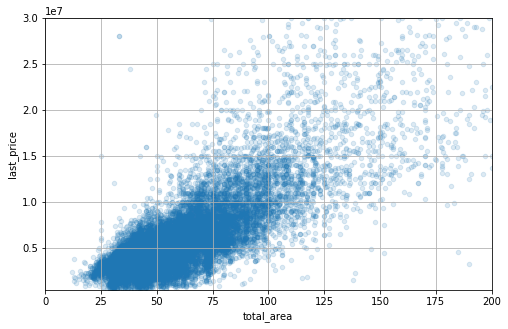

In [68]:
# построение графика зависимости стоимости от площади
df.plot(x='total_area', y='last_price', kind='scatter', xlim=(0, 200), ylim=(4.0e+05, 3.0e+07),\
        figsize=(8, 5), alpha=0.15, grid=True);

Рассчитаем коэффициент корреляции Пирсона для этих двух величин.

In [69]:
# определение коэффициента корреляции Пирсона
df[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.653741
total_area,0.653741,1.000000


* Из графика видна закономерность роста стоимости квартир при увеличении их площади, что логично.
* Коэффициент корреляции Пирсона для данной пары признаков составляет `0.643`. Величина коэффициента говорит о заметной связи между площадью квартир и их стоимостью.

#### Влияние числа комнат на стоимость квартир

Построим график зависимости стоимости квартир `last_price` от количества комнат `rooms`. Для получения более наглядной зависимости ограничим стоимость квартир значениями от `4.0e+05` до `3.0e+07`.

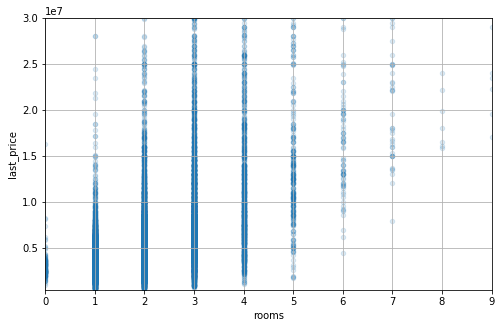

In [70]:
# построение графика зависимости стоимости от количества комнат
df.plot(x='rooms', y='last_price', kind='scatter', xlim=(0, 9), ylim=(4.0e+05, 3.0e+07),\
        figsize=(8, 5), alpha=0.15, grid=True);

Для категориального признака по количеству комнат `rooms` получен график, по которому невозможно сделать какие-либо выводы и выявить закономерности. Поэтому, сгруппируем данные по количеству комнат и найдем в каждой группе медианное значение, после чего по полученным значениям построим линейный график.

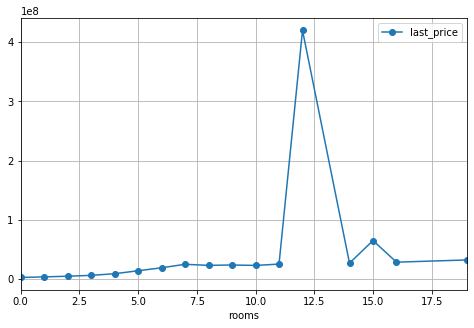

In [71]:
# группировка данных по количеству комнат и вычисление медианных значений в группах, построение графика
(
    df.groupby('rooms')['last_price']
    .agg(last_price='median')
    .plot(y='last_price', style='-o', figsize=(8, 5), grid=True)
);

<div class="alert alert-info">
<b class="alert-heading"> Комментарий ревьюера</b>

В данном случае можно было построить boxplot по каждой группе. Удобный функционал для этого есть у библиотеки seaborn. 
    
</div>

В целом график плавный, но присутствует значительный аномальный всплеск для квартир с количеством комнат равным `12` и менее выраженный для квартир с количеством комнат равным `15`. Попробуем разобраться с причинами их появления. Для этого отобразим данные, количество комнат в которых, соотвествует `12` и `15`.

In [72]:
# просмотр данных с количеством комнат 12 и 15
display(df.query('rooms == 12 or rooms == 15'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,total_area_category,square_meter_price,publish_weekday,publish_month,publish_year,floor_cat,living_to_total,kitchen_to_total
5358,20,65000000,590.0,2019-02-14,15,3.5,6,409.0,3,False,...,NaN,14.0,B,110169,3,2,2019,другой,0.69,0.17
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,318.0,106.0,A,466666,2,12,2017,последний,0.46,0.12


Аномалии получены из двух записей в таблице. Отметим, что одна из них также обладает и максимальным значением площади в 900 м². Удалим данные строки как аномальные и проверим какой вид график примет после этого.

In [73]:
# удаление строки с аномальными значениями 
df = df.drop(df.index[list((df.query('rooms == 12 or rooms == 15').index))]).reset_index(drop=True)

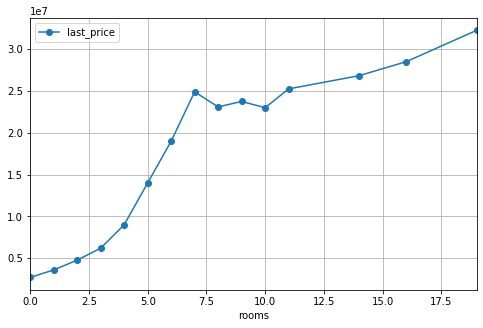

In [74]:
# перестроим график после удаления аномалий
df.groupby('rooms')['last_price'].agg(last_price='median').plot(y='last_price',\
                                                                style='-o', figsize=(8, 5), grid=True);

Теперь график принял приемлемый для анализа вид.

Рассчитаем коэффициент корреляции Пирсона между количеством комнат и стоимостью квартир.

In [75]:
# определение коэффициента корреляции Пирсона
df[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.358864
rooms,0.358864,1.000000


* До значений количества комнат равного `7`, количество комнат оказывает более сильное влияние на стоимость квартир, а после этого значения влияние снижается.
* В диапазоне `1-7` комнат при увеличении количества комнат растёт также и цена квартир. На участке `7-10` комнат рост прекращается и даже наблюдается незначительное снижение. Но, после `10` комнат рост стоимости квартир при увеличении количества комнат в них возобновляется, но происходит уже более плавно.
* Коэффициент корреляции Пирсона для данной пары признаков составляет `0.36`, что говорит об умеренной связи между количнством комнат и стоимостью квартир.

#### Влияние удалённости от центра на стоимость квартир

Построим график зависимости стоимости квартир `last_price` от показателя удалённости от  центра `city_сenters_nearest`. Для получения более наглядной зависимости ограничим стоимость квартир значениями от `4.0e+05` до `3.0e+07`, а величину удалённости диапазоном `0-50000`.

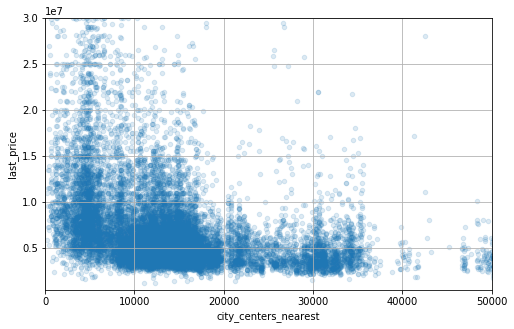

In [76]:
# построение графика зависимости стоимости от удалённости от центра
df.plot(x='city_сenters_nearest', y='last_price', kind='scatter', xlim=(0, 50000), ylim=(4.0e+05, 3.0e+07),\
        figsize=(8, 5), alpha=0.15, grid=True);

На графике практически невозможно определить какие-либо закономерности в данных. Поэтому. попробуем категоризировать признак `city_сenters_nearest`, найти в полученных категориях медианные значения и построить по ним линейный график.

Для категоризации определим диапазон, в котором находятся значения удалённости квартир от центра.

In [77]:
# просмотр минимального и максимального значений удалённости квартир от центра
df['city_сenters_nearest'].min(), df['city_сenters_nearest'].max()

(181.0, 65968.0)

Создадим вспомогательную функцию, которая разобьёт диапазон на заданные шагом `group_step` части и присвоит им порядковые номера.

In [78]:
# вспомогательная функция для категоризации удалённости квартир от центра
def get_nearest_group(row):
    """
    input: row - строка из датафрейма, содержащая информацию о квартире
    ouput: (object) - категория удалённости квартиры от центра
    
    Функция принимает на вход строку с данными,
    сравнивает этаж квартиры `floor` со значением общего количества этажей в доме `floors_total`
    и возвращает категорию:
    
    Категория:          Описание:
    N(i)                Каждому значению удалённости с шагом 5000 присваиваем категорию N(i), где i - номер шага
    """
    nearest = row['city_сenters_nearest']
    
    if nearest:
        group_step = 5000  
        start_group_value = np.arange(0, 70000, group_step)
        
        i = 0
        for value in start_group_value:
            i += 1
            if value + 1.0e-5 <= nearest <= value + group_step:
                return int(i)
    else:
        return np.nan

Произведём категоризацию признака удалённости квартир от центра `city_сenters_nearest` с добавлением в таблицу новых данных о категориях в столбец `сenters_nearest_category`.

In [79]:
# добавление категориальных данных по удалённости квартир от центра
df['сenters_nearest_category'] = df.apply(get_nearest_group, axis=1)

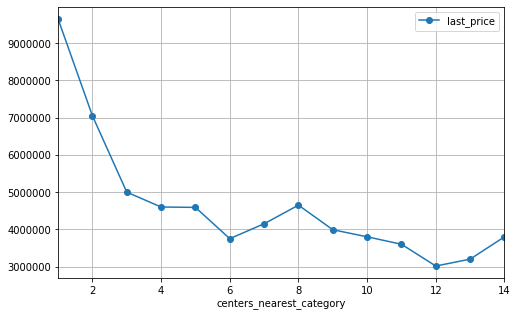

In [80]:
# построение графика зависимости стоимости от дня недели размещения объявления
(
    df.groupby('сenters_nearest_category')['last_price']
    .agg(last_price='median')
    .plot(y='last_price', style='-o', figsize=(8, 5), grid=True)
);

Рассчитаем коэффициент корреляции Пирсона между стоимостью квартир и их удалённостью от центра.

In [81]:
# определение коэффициента корреляции Пирсона
df[['last_price', 'city_сenters_nearest']].corr()

,last_price,city_сenters_nearest
last_price,1.000000,-0.212111
city_сenters_nearest,-0.212111,1.000000


* Линейный график более нагляден и демонстрирует логичную зависимость снижения стоимости квартир при увеличении расстояния от центра.
* Резкое падение наблюдается на участке с категориями `0-4`, соотвествующими рассоянию `0-20 км`. Далее скорость падения замедляется.
* Отрицательное значение коэффициента Пирсона, равное `-0.21` говорит об отсуствии линейной связи между стоимостью квартир и их удалённостью от центра.

#### Влияние этажа квартиры на её стоимость

Построим график зависимости стоимости квартир `last_price` от категориального признака того, на каком этаже находится квартира `floor_cat`.

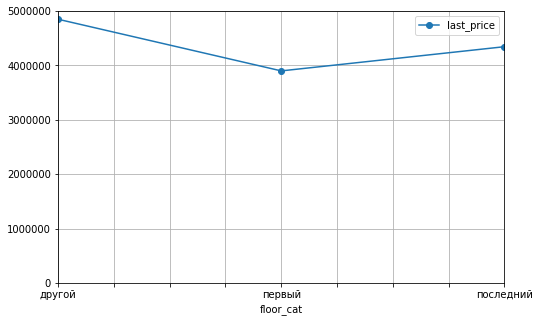

In [82]:
# построение графика зависимости стоимости от категориального призака в виде этажа квартиры
df.groupby('floor_cat')['last_price'].agg(last_price='median').plot(y='last_price',\
                                                                style='-o', figsize=(8, 5), ylim=(0, 5.0e+6), grid=True);

Из графика видно, что некоторая зависимость между стоимостью квартир и этажом, на котором они расположены, присутсвует. Оценить её величину количественно мешает то, что признак этажа категориальный и рассчитать для него коэффициент корреляции Пирсона не получится.

Чтобы вычислить коэффициент корреляции добавим дополнительный столбец к данным, в котором категориальные признаки переведём в числовые значения:
* `первый - 0`
* `другой - 1`
* `последний - 2`

In [83]:
# вспомогательная функция для добавления категорий по этажу квартир в виде числовых значений

def get_floor_cat_number(row):
    """
    input: row - строка из датафрейма, содержащая информацию о квартире
    ouput: (object) - категория этажа квартиры в числовом виде
    Функция принимает на вход строку с данными,
    и переводит категорию этажа квартиры `floor_cat` в числовые значения `floor_cat_number`:
    
    Категория:          Значение:
    первый              0
    другой              1
    последний           2
    """
    floor_cat = row['floor_cat']
    
    if floor_cat == 'первый':
        return 0
    elif floor_cat == 'другой':
        return 1
    else:
        return 2

In [84]:
# добавление категориальных данных по этажу квартиры в числовом виде
df['floor_cat_number'] = df.apply(get_floor_cat_number, axis=1)

* По графику зависимости между стоимостью квартиры и категорией этажа, на котором она расположена, можно отметить, что цена квартир на первом и последнем этажах ниже, чем на всех остальных.

#### Влияние даты размещения объявления о продаже квартиры на её стоимость

Построим графики зависимости стоимости квартир `last_price` от дня недели `publish_weekday`, месяца `publish_month` и года `publish_year` размещения объявлений.

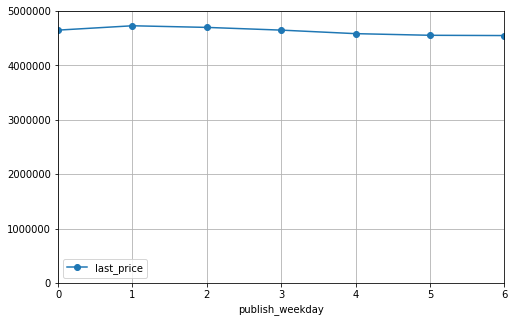

In [85]:
# построение графика зависимости стоимости от дня недели размещения объявления
(
    df.groupby('publish_weekday')['last_price']
    .agg(last_price='median')
    .plot(y='last_price', style='-o', figsize=(8, 5), ylim=(0, 5.0e+6), grid=True)
);

* По графику какой-либо выраженной зависимости между стоимостью квартир и днём недели публикации объявления не обнаружено.

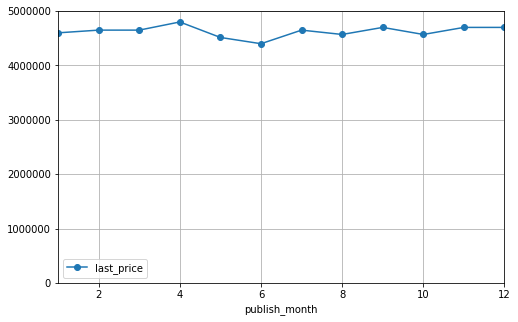

In [86]:
# построение графика зависимости стоимости от месяца размещения объявления
(
    df.groupby('publish_month')['last_price']
    .agg(last_price='median').plot(y='last_price', style='-o', figsize=(8, 5), ylim=(0, 5.0e+6), grid=True)
);

* На графике наблюдаются колебания стоимости квартир в зависимости от месяца размещения объявления, но какой-либо выраженной зависимости между ценой квартир и месяцем публикации объявления они не демонстрируют.

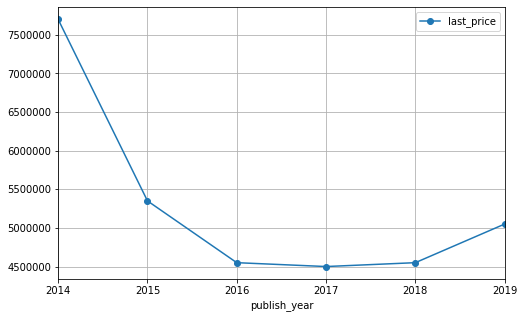

In [87]:
# построение графика зависимости стоимости от года размещения объявления
(
    df.groupby('publish_year')['last_price']
    .agg(last_price='median')
    .plot(y='last_price', style='-o', figsize=(8, 5), grid=True)
);

* Из графика следует, что в период 2014-2015 годов произошло резкое снижение стоимости квартир, которое продолжилось в период 2015-2016 годов, но его темп снизился. В период 2016-2018 годов наблюдалась стабилизация и стоимость квартир практически не менялась, а после 2018 года был отмечен некоторый рост.

### Исследование стоимости квадратного метра в различных населённых пунктах

Выделим 10 населённых пунктов с наибольшим количеством объявлений и рассчитаем среднюю цену квадратного метра в этих населённых пунктах. Сохраним полученные данные в отдельной переменной `top_ads_localities`.

In [88]:
# выделение, расчет средней стоимости квадратного метра и сохранение в переменную 10 населённых пунктов 
# с наибольшим количеством объявлений
top_ads_localities = (
    df.groupby('locality_name')['square_meter_price']
    .agg(['count', 'mean'])
    .rename(columns={'count': 'count_ads'})
    .sort_values(by='count_ads', ascending=False)
    .head(10)
)

display(top_ads_localities)

,count_ads,mean
locality_name,,
Санкт-Петербург,15719,114833.588778
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


Визуализируем полученные данные, построив гистограмму, отражающую зависимость цены за квадратный метр от населённого пункта.

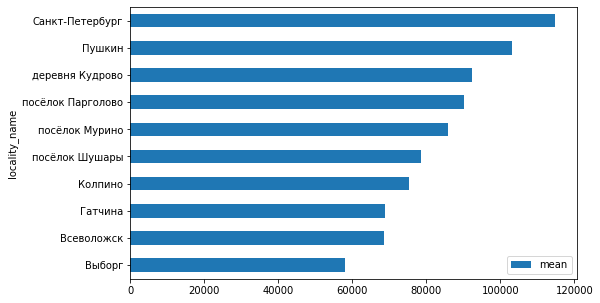

In [89]:
# построение гисторгаммы зависимости цены за квадратный метр от населённого пункта
(
    top_ads_localities[['mean']]
    .sort_values(by='mean', ascending=True)
    .plot.barh(figsize=(8, 5))
);

* Самая высокая стоимость квадратного метра квартир по изучаемым данным наблюдается в Санкт-Петербурге (`114833.58`), Пушкине (`103125.37`) и деревне Кудрово (`92473.09`).
* Самая низкая стоимость квадратного метра жилья наблюдается в Гатчине (`68745.69`), Всеволжске (`68654.00`) и Выборге (`58141.49`).

### Определение центрального района в Санкт-Петербурге

Определим область, которую можно отнести к центру Санкт-Петербурга. Общая идея заключается в том, чтобы из данных выделить квартиры в Санкт-Петербурге, в полученных данных определить расстояние до центра в километрах и окрулить до целых значений, рассчитать среднюю цену для каждого километра и нанести полученные значения на график. Найти точку резкого изменения характера графика значение которой и будет представлять собой границу центральной зоны.

Создадим новый датафрейм `spb` и сохраним в него все объявления, соотвествующие локации `locality_name = Санкт-Петербург`. При этом необходимо, чтобы в датафрейм не попали строки с пропуском по данным о расстоянии до центра `city_сenters_nearest`.

In [90]:
# создание отдельного датафрейма с объявлениями по Санкт-Петербургу
spb = df.query('locality_name=="Санкт-Петербург" and city_сenters_nearest > 0').reset_index(drop=True)

Проверим размер полученного датасета, чтобы убедиться что данных достаточно для проведения исследования.

In [91]:
# проверка размер получившегося датасета
display(spb.shape)

(15658, 32)

Получена таблица в `15658` строк. Можно приступать к исследованию.

Так как данные в столбце `city_сenters_nearest` приведены в метрах, необходимо произвести их перевод в километры с округлением до целых значений после чего сохраним полученные значения в новый стобец с именем `city_сenters_nearest_km`

In [92]:
# расчёт значений и сохранение в столбец city_сenters_nearest_km
spb['city_сenters_nearest_km'] = round(spb['city_сenters_nearest'] / 1000)

# преобразование значений city_сenters_nearest_km в целые
spb['city_сenters_nearest_km'] = spb['city_сenters_nearest_km'].apply(lambda x: math.ceil(x))

Сгруппируем данные по созданному столбцу `city_сenters_nearest_km` с расстоянием до центра в километрах и построим график, который отобразит как цена меняется при удалении от центра.

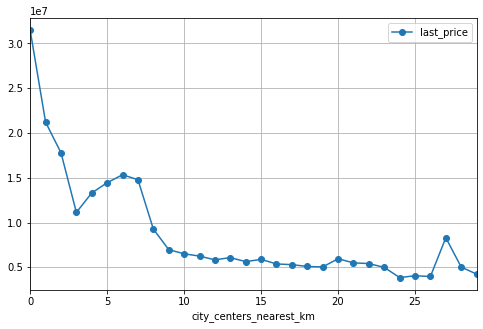

In [93]:
# построение графика зависимости стоимости от удаления от центра
(
    spb.groupby('city_сenters_nearest_km')['last_price']
    .agg(last_price='mean')
    .plot(y='last_price', style='-o', figsize=(8, 5), grid=True)
);

Интерпретацию графика и определение переломной точки затрудняет наличие всплека в диапазоне значений `3-9 км`. Попробуем провести полиномиальное сглаживание графика.

In [94]:
# сохраним данные групировки стоимости квартир в зависимости от удаления от центра в отдельный датасет spb_mean_price
spb_mean_price = spb.groupby('city_сenters_nearest_km')['last_price'].agg(last_price='mean').reset_index()

# создадим списки значений для последующего сглаживания xlist и ylist
xlist = spb_mean_price.city_сenters_nearest_km.tolist()
ylist = spb_mean_price.last_price.tolist()

# произведем полиномиальное сглаживание ylist
poly = np.polyfit(xlist, ylist,6)
poly_y = np.poly1d(poly)(xlist)

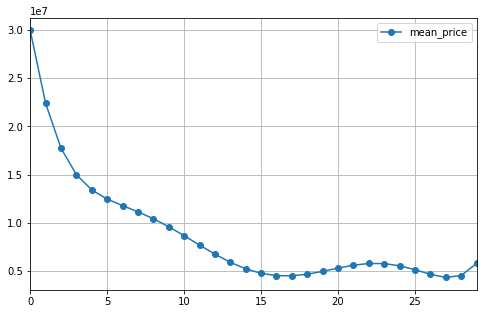

In [95]:
# построение графика для полиномиально сглаженных данных
(
    pd.DataFrame(poly_y, xlist)
    .rename(columns={0: 'mean_price'})
    .plot(y='mean_price', style='-o', figsize=(8, 5), grid=True)
);

* На сглаженном графике видно, что стоимость квартир начинает резко возрастать после значения расстояния до центра <=4 км. Для целей настоящего исследования будем считать, что граница центральной зоны очерчена радиусом `4 км`.

### Изучение сегмента квартир в центре и его сравнение со всей базой объявлений

Для удобства работы с данными сохраним все объявления о продаже квартир в центре в отдельный датафрейм `df_center`. Для этого отфильтруем исходный датафрейм по признаку `city_сenters_nearest`. В качестве порога отсечки, определяющего центр города, возьмем значение `4 км`, определённое выше.

In [96]:
# сохраним в новый датафрейм df_center все объявления, для которых выполняется условие city_сenters_nearest <= 4000.
df_center = df.query('city_сenters_nearest <= 4000').reset_index(drop=True)

Проверим размер полученного датасета, чтобы убедиться что данных достаточно для проведения исследования.

In [97]:
# проверка размер получившегося датасета
display(df_center.shape)

(1165, 32)

Получена таблица в `1165` строк. Можно приступать к исследованию.

Для полученной подвыборки, характеризующей центр Санкт-Петербурга, проанализируем и изучим следующие параметры:
* площадь квартир `total_area`;
* стоимость квартир `last_price`;
* число комнат `rooms`;
* высоту потолков `ceiling_height`.

Выделим факторы, влияющие на стоимость квартир:
* число комнат `rooms`;
* категорию этажа, на котором расположена квартира `floor_cat`;
* удалённость от центра `city_сenters_nearest`;
* день недели `publish_weekday`, месяц `publish_month` и год `publish_year` размещения объявлений.

Сравним данные факторы с аналогичными, полученными ранее по всей базе данных.

Чтобы избежать дублирования кода и иметь возможность наглядного сравнения различных параметров для центра Санкт-Петербурга и для всей базы данных создадим вспомогательную функцию, которая построит две гистограммы (для центра города и для всех объявлений) в единой системе координат.

In [98]:
# функция для отрисовки двойных гистограмм
def show_double_hist(column_name, bins_count, range_values):
    """
    input: column_name (str) - название параметра (столбца)
           bins_count (int) - количество корзин в гистограмме
           range_values (tuple) - пределы значений в столбце column_name для построения гистограммы
    ouput: None
    Функция отрисовывает парную гистограмму из данных датафреймов df и df_center для столбца column_name
    в единой системе координат.
    """
    
    ax = df.plot(
        kind = 'hist',
        y = column_name,
        range = range_values,
        bins = bins_count,
        linewidth = 3,
        density = True,
        alpha = 0.7,
        figsize=(8, 5),
        label = column_name + '_general_data'
        )
    
    df_center.plot(
        kind = 'hist',
        y = column_name,
        range = range_values,
        bins = bins_count,
        linewidth = 3,        
        density = True,
        alpha = 0.7,
        figsize=(8, 5),
        label = column_name + '_center_data',
        ax = ax,
        grid = True,
        legend = True,
        )
    
    plt.show();

#### Изучение параметров площади, стоимости, числа комнат и высоты потолков квартир в центре и их сравнение с аналогичными значениями по всеми данными

Изучим параметр общей площади квартир `total_area` в центре Санкт-Петербурга и сравним его со всеми данными. Для этого посмотрим на его основные описательные статистики с помощью метода *describe()* и построим гистограммы распределения данного признака, передав наименование столбцов в таблицах `df` и `df_center` в функцию `show_double_hist`, указав в качестве  аргументов функции `bins_count=20` и `range_values=(0, 400)`.

count    1165.000000
mean       97.371365
std        55.659083
min        12.000000
25%        62.000000
50%        84.100000
75%       115.200000
max       517.000000
Name: total_area, dtype: float64

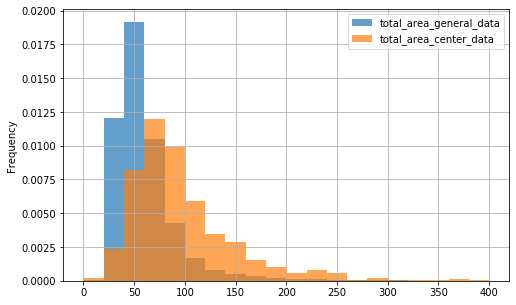

In [99]:
# вывод информации о распределении показателя `total_area` для данных по центру города методом describe()
display(df_center['total_area'].describe())

# построение гистограммы распределении параметра `total_area` с помощью функции show_double_hist()
show_double_hist('total_area', bins_count=20, range_values=(0, 400))

* Медианное и среднее значения площади квартир `total_area` в центре равны `84.1` и `97.4` соответственно.
* Для сравнения медианное и среднее значения площади квартир `total_area` для всех объявлений равны `52.0` и `60.3` соответственно.
* Их сравнение показывает, что гистограмма распределения площади квартир в центре города смещена правее как по среднему, так и по медиане, что наглядно отражено на графике выше.
---

Изучим параметр цены `last_price` в центре Санкт-Петербурга и сравним его со всеми данными. Для этого посмотрим на его основные описательные статистики с помощью метода *describe()* и построим гистограммы распределения данного признака, передав наименование столбцов в таблицах `df` и `df_center` в функцию `show_double_hist`, указав в качестве аргументов функции `bins_count=30` и `range_values=(0, 8*10**7)`.

count    1.165000e+03
mean     1.600476e+07
std      3.284043e+07
min      2.100000e+06
25%      7.000000e+06
50%      9.500000e+06
75%      1.449000e+07
max      7.630000e+08
Name: last_price, dtype: float64

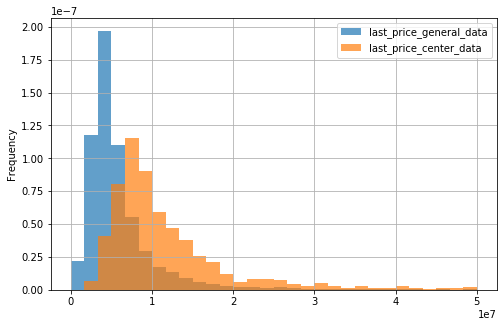

In [100]:
# вывод информации о распределении показателя `last_price` для данных по центру города методом describe()
display(df_center['last_price'].describe())

# построение гистограммы распределении параметра `last_price` с помощью функции show_double_hist()
show_double_hist('last_price', bins_count=30, range_values=(0, 5*10**7))

* Медианное и среднее значения стоимости квартир `last_price` в центре равны `9.50e+06` и `1.600476e+07` соответственно.
* Для сравнения медианное и среднее значения стоимости квартир `last_price` для всех объявлений равны `4.650000e+06` и `6.542063e+06` соответственно.
* Их сравнение показывает, что характер распределения стоимости квартир в центре города аналогичен характеру распределения по всем данными и отличается лишь смещением вправо как по среднему, так и по медиане.
---

Изучим параметр число комнат квартир `rooms` по объявлениям  в центре Санкт-Петербурга и сравним его со всеми данными. Для этого посмотрим на его основные описательные статистики с помощью метода *describe()* и построим гистограммы распределения данного признака, передав наименование столбцов в таблицах `df` и `df_center` в функцию `show_double_hist` и указав в качестве аргументов функции `bins_count=15` и `range_values=(0, 15)`.

count    1165.000000
mean        3.103863
std         1.556064
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

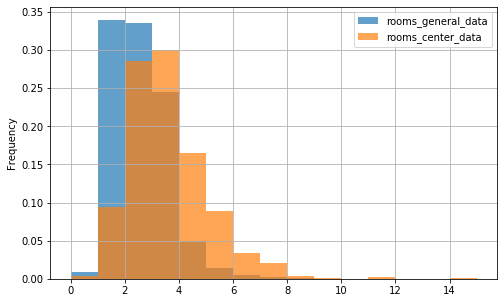

In [101]:
# вывод информации о распределении показателя `rooms` для данных по центру города методом describe()
display(df_center['rooms'].describe())

# построение гистограммы распределении параметра `last_price` с помощью функции show_double_hist()
show_double_hist('rooms', bins_count=15, range_values=(0, 15))

* Медианное и среднее значения количества комнат `rooms` в центре равны `3.0` и `3.1` соответственно.
* Для сравнения медианное и среднее значения количества комнат `rooms` для всех объявлений равны `2.0` и `2.08` соответственно.
* Их сравнение показывает, что характер распределения количества комнат в центре города аналогичен характеру распределения количества комнат по всем данными и отличается лишь смещением вправо как по среднему, так и по медиане.
---

Изучим параметр высоты потолков квартир `ceiling_height` по объявлениям  в центре Санкт-Петербурга и сравним его со всеми данными. Для этого посмотрим на его основные описательные статистики с помощью метода *describe()* и построим гистограммы распределения данного признака, передав наименование столбцов в таблицах `df` и `df_center` в функцию `show_double_hist` и указав в качестве аргументов функции `bins_count=15` и `range_values=(2.5, 3.6)`.

count    1165.000000
mean        2.922961
std         0.268371
min         2.500000
25%         2.700000
50%         2.800000
75%         3.130000
max         3.500000
Name: ceiling_height, dtype: float64

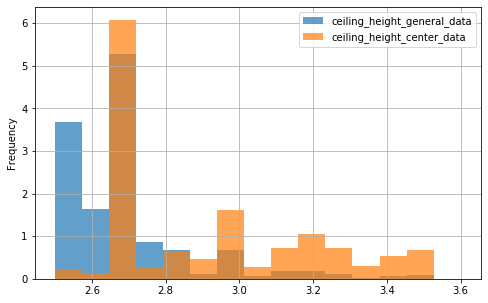

In [102]:
# вывод информации о распределении показателя `ceiling_height` для данных по центру города методом describe()
display(df_center['ceiling_height'].describe())

# построение гистограммы распределении параметра `ceiling_height` с помощью функции show_double_hist()
show_double_hist('ceiling_height', bins_count=15, range_values=(2.5, 3.6))

* Медианное и среднее значения высоты потолков `ceiling_height` в центре равны `2.8` и `2.9` соответственно.
* Для сравнения медианное и среднее значения количества комнат `rooms` для всех объявлений в данных были равны `2.7` и `2.7`, соответственно.
* Их сравнение показывает, что характер распределения высоты потолков в центре города аналогичен характеру распределения количества комнат по всем данными и отличается лишь смещением вправо как по среднему, так и по медиане.
* Сами значения среднего и медианы для высоты потолков в центре города незначительно отличаются, что означает изначально меньшее количество пропусков по данному показателю в центре и меньшее влияние на него последующего заполнения пропущенных значений, выполненного на этапе предварительной обработки данных.
---

Чтобы оценить влияние на стоимость квартиры в центре и сравнить его с аналогичными показателями по всей базе для таких параметров как число комнат `rooms`, категория этажа, на котором расположена квартира `floor_cat`, удалённость от центра `city_сenters_nearest`, день недели `publish_weekday`, месяц `publish_month` и год `publish_year` размещения объявлений, создадим две вспомогательные функции *show_double_scatter()* и *show_double_line()* для отрисовки графиков, которые помогут избежать дублирования повторно используемого кода.

In [103]:
# функция для отрисовки парных линейных графиков 
def show_double_line(column_name, range_value, ylim=(0, 3.6*10**7)):
    """
    input: column_name (str) - название параметра (столбца)
           bins_count (int) - количество корзин в гистограмме
           range_value (tuple) - пределы значений в столбце column_name для построения гистограммы
           ylim (tuple) - пределы значений по у оси для построения гистограммы
    ouput: None
    Функция отрисовывает парные линейные графики из данных датафреймов df и df_center для столбца column_name
    в единой системе координат.
    """
    
    ax = (df.groupby(column_name)['last_price']
          .agg(last_price='median')
          .plot(y='last_price',
                style='-o',
                figsize=(8, 5),
                ylim = ylim,
                label = column_name + '_general_data',
                grid=True)
         )
          
    (
        df_center.groupby(column_name)['last_price']
        .agg(last_price='median')
        .plot(ax = ax,
              y='last_price',
              style='-o',
              figsize=(8, 5),
              ylim = ylim,
              label = column_name + '_center_data',
              grid=True
             )
    )
    plt.show()

In [104]:
# функция для отрисовки парных диаграмм рассеяния
def show_double_scatter(column_name, range_value):
    """
    input: column_name (str) - название параметра (столбца)
           bins_count (int) - количество корзин в гистограмме
           range_value (tuple) - пределы значений в столбце column_name для построения гистограммы
    ouput: None
    Функция отрисовывает парные диаграммы рассеяния из данных датафреймов df и df_center для столбца column_name
    в единой системе координат.
    """
    
    ax = df.plot(x = column_name,
                 y = 'last_price',
                 kind = 'scatter',
                 alpha = 0.3,
                 figsize = (8, 5),
                 xlim = range_value,
                 ylim = (0, 3.6*10**7),
                 label = column_name + '_general_data',
                 grid = True)
    
    df_center.plot(ax = ax,
                   x = column_name,
                   y = 'last_price',
                   kind = 'scatter',
                   color='green',
                   alpha = 0.3,
                   figsize = (8, 5),
                   xlim = range_value,
                   ylim = (0, 3.6*10**7),
                   label = column_name + '_center_data',
                   grid = True
                  )
    plt.show()

#### Изучение влияния площади квартир в центре города на их стоимость

Воспользуемся созданной функцией `show_double_scatter()` для того, чтобы посторить графики зависимости стоимости квартир `last_price` от общей площади `total_area` в центре города и по всей базе данных. Для получения более наглядной зависимости ограничим площадь диапазоном `0-220`.

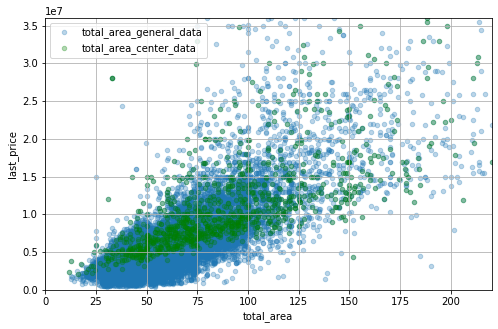

In [105]:
# построение графиков зависимости стоимости квартир от площади в центре города и по всем объявлениям
show_double_scatter('total_area', range_value=(0, 220))

Рассчитаем коэффициент корреляции Пирсона этих двух величин для сегмента центра города.

In [106]:
# определение коэффициента корреляции Пирсона
df_center[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.532068
total_area,0.532068,1.000000


* Коэффициент корреляции Пирсона для данной пары признаков в сегменте квартир в центре города составил `0.53`, тогда как для всей выборки он был равен `0.643`.
* Исходя из коэффициента корреляции, площадь квартир по-прежнему оказывает заметное влияние на их стоимость.

#### Изучение влияния числа комнат квартир в центре города на их стоимость

Воспользуемся созданной функцией `show_double_line()` для того, чтобы посторить графики зависимости стоимости квартир `last_price` от количества комнат `rooms` в центре города и по всей базе данных. Для получения более наглядной зависимости ограничим количество комнат диапазоном `1-20`, а стоимость квартир значениями от `0` до `9.6*10**7`.

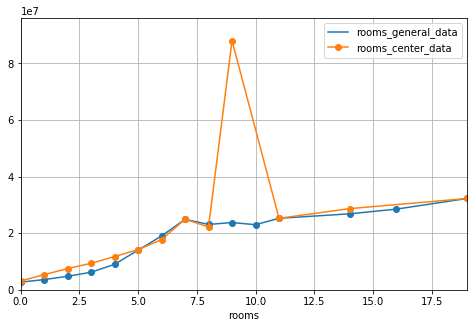

In [107]:
# построение графиков зависимости стоимости квартир от количества комнат в центре города и по всем объявлениям
show_double_line('rooms', range_value=(1, 20), ylim=(0, 9.6*10**7))

Вид графика портит аномальный всплеск на значинии количества комнат, равном `9`. Попробуем разобраться за счёт чего он получен. Для этого просмотрим все данные по квартирам с количеством равным `9`.

In [108]:
# просмотр данных с количеством комнат 9
display(df_center.query('rooms == 9'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_category,square_meter_price,publish_weekday,publish_month,publish_year,floor_cat,living_to_total,kitchen_to_total,сenters_nearest_category,floor_cat_number
766,15,88000000,400.0,2019-03-27,9,2.5,2,250.0,1,False,...,C,220000,2,3,2019,первый,0.62,0.12,1.0,0


Аномалия на графике образована одним значением стоимость квартиры в котором значительно завышена по отношению к остальным данным. А так как оно одно, то сгладить эту аномалию алгоритм медианного усреднения по подвыборке не смог. Поэтому, чтобы привести график к более приемлемому виду, удалим данное значение.

In [109]:
# удаление строки с аномальным значением
df_center = df_center.drop(df_center.index[list((df_center.query('rooms == 9').index))])\
.reset_index(drop=True)

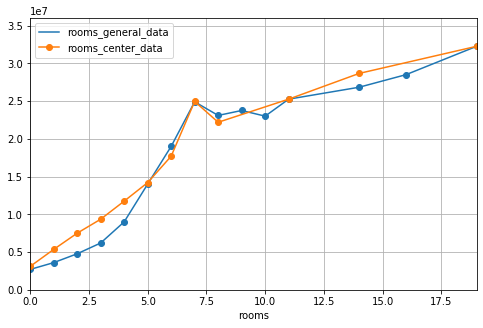

In [110]:
# построение графиков зависимости стоимости квартир от количества комнат в центре города и по всем объявлениям для 
# для скорректированных значений
show_double_line('rooms', range_value=(1, 20))

Рассчитаем коэффициент корреляции Пирсона этих двух величин для сегмента центра города.

In [111]:
# определение коэффициента корреляции Пирсона
df_center[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.239322
rooms,0.239322,1.000000


* Коэффициент корреляции Пирсона для данной пары признаков в сегменте квартир в центре города составил `0.24`, что говорит о слабой линейной связи согласно таблицы Чеддока.
* На графике также видна особенность, что в диапазоне `1-4` стоимость квартир в центре города выше по сравнению со всей выборкой.

#### Изучение влияния удалённости квартир от центра города на их стоимость

Воспользуемся созданной функцией `show_double_scatter()` для того, чтобы посторить графики зависимости стоимости квартир `last_price` от показателя удалённости от  центра `city_сenters_nearest` в центре города и по всей базе данных. Для получения более наглядной зависимости ограничим величину удалённости от центра диапазоном `0-30000`.

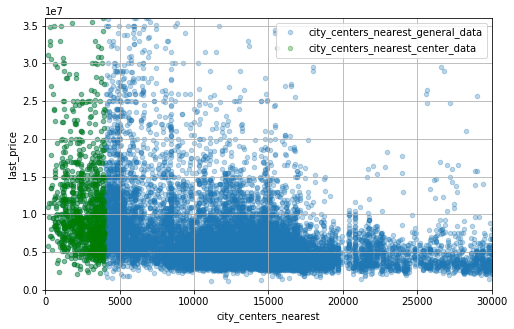

In [112]:
# построение графиков зависимости стоимости квартир от удалённости от центра в центре города и по всем объявлениям
show_double_scatter('city_сenters_nearest', range_value=(0, 30000))

Как и в случае построения scatterplot зависимости между стомостью квартир и удалённостью от центра для всех объявлений, аналогичный график для сегмента квартир в центре также неинформативен. На нём лишь очень хорошо видна граница отсечки данных в `4 км` по которой они были отнесены к центру города.



Создадим вспомогательную функцию, которая разобьёт диапазон удалённости квартир на заданные шагом `group_step` части и присвоит им порядковые номера.

In [113]:
# вспомогательная функция для категоризации удалённости квартир от центра
def get_nearest_center_group(row):
    """
    input: row - строка из датафрейма, содержащая информацию о квартире
    ouput: (object) - категория удалённости квартиры от центра
    
    Функция принимает на вход строку с данными,
    сравнивает этаж квартиры `floor` со значением общего количества этажей в доме `floors_total`
    и возвращает категорию:
    
    Категория:          Описание:
    N(i)                Каждому значению удалённости с шагом 500 присваиваем категорию N(i), где i - номер шага
    """
    nearest = row['city_сenters_nearest']
    
    group_step = 500
    start_group_value = np.arange(0, 4000, group_step)
        
    i = 0
    for value in start_group_value:
        i += 1
        if value + 1.0e-5 <= nearest <= value + group_step:
            return int(i)

Произведём категоризацию признака удалённости квартир от центра `city_сenters_nearest` с добавлением в таблицу новых данных о категориях в столбец `сenters_nearest_sub_category` для сегмента квартир в центре города.

In [114]:
# добавление категориальных данных по удалённости квартир от центра
df_center['сenters_nearest_sub_category'] = df_center.apply(get_nearest_center_group, axis=1)

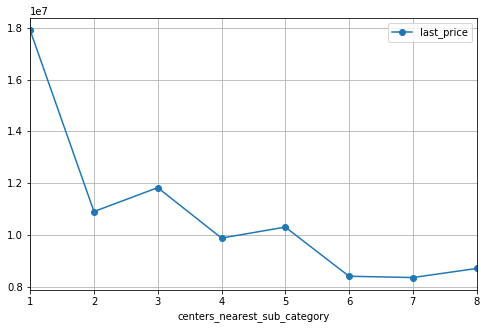

In [115]:
# построение графика зависимости стоимости от дня недели размещения объявления
(
    df_center.groupby('сenters_nearest_sub_category')['last_price']
    .agg(last_price='median')
    .plot(y='last_price', style='-o', figsize=(8, 5), grid=True)
);

Рассчитаем коэффициент корреляции Пирсона этих двух величин для сегмента центра города.

In [116]:
# определение коэффициента корреляции Пирсона
df_center[['last_price', 'city_сenters_nearest']].corr()

,last_price,city_сenters_nearest
last_price,1.000000,-0.094463
city_сenters_nearest,-0.094463,1.000000


* Линейный график более нагляден и демонстрирует логичную зависимость снижения стоимости квартир при увеличении расстояния от центра. Характер зависимости очень похож на тот, что наблюдался для данных показателей по всем объявлениям. Хаотичные колебания в центре могут быть объяснены малым количеством данных.
* Коэффициент корреляции Пирсона для данной пары признаков в сегменте квартир в центре города составил `-0.09`, что говорит об отсуствии линейной связи между данными параметрами.

#### Изучение влияния этажа квартир в центре города на их стоимость

Воспользуемся созданной функцией `show_double_line()` для того, чтобы посторить графики зависимости стоимости квартир `last_price` от категориального признака того, на каком этаже находится квартира `floor_cat` в центре города и по всей базе данных. Для получения более наглядной зависимости ограничим диапазон стоимости квартир значениями `2.0*10**6-1.5*10**7`.

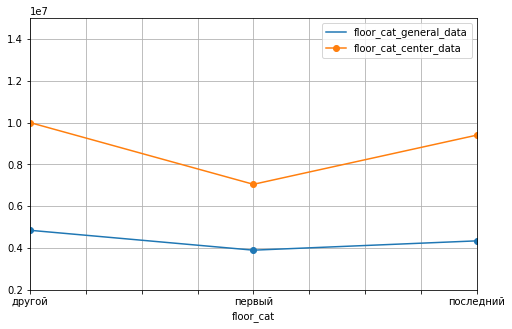

In [117]:
# построение графиков зависимости стоимости квартир от этажа в центре города и по всем объявлениям
show_double_line('floor_cat', range_value=(), ylim=(2.0*10**6, 1.5*10**7))

Рассчитаем коэффициент корреляции Пирсона этих двух величин для сегмента центра города.

In [118]:
# определение коэффициента корреляции Пирсона
df_center[['last_price', 'floor_cat_number']].corr()

,last_price,floor_cat_number
last_price,1.000000,0.085735
floor_cat_number,0.085735,1.000000


* Коэффициент корреляции Пирсона для данной пары признаков в сегменте квартир в центре города составил `0.09`, тогда как для всей выборки он был равен `0.06`. Значения коэффициентов для данной пары признаков, как и их дельта, незначительны для каких-либо выводов.
* График отображает общую закономерность, что стоимость квартир в центре выше по сравнению со всей базой на любых этажах.

#### Изучение влияния даты размещения объявления о продаже квартир в центре города на их стоимость

Построим графики зависимости стоимости квартир `last_price` от дня недели `publish_weekday`, месяца `publish_month` и года `publish_year` размещения объявлений в центре города и по всей базе данных. Для получения более наглядной зависимости ограничим диапазон стоимости квартир значениями `2.0*10**6-1.5*10**7` для графиков зависимости от дня недели и месяца публикации и значениями `2.0*10**7-2.7*10**7` для графиков зависимости от года публикации объявлений.

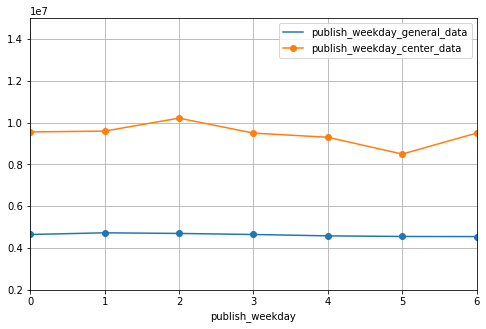

In [119]:
# построение графиков зависимости стоимости квартир от дня недели подачи объявления
# в центре города и по всем объявлениям
show_double_line('publish_weekday', range_value=(0, 6), ylim=(2.0*10**6, 1.5*10**7))

* График также отображает общую закономерность, что стоимость квартир в центре выше по сравнению со всей базой независимо от дня недели публикации объявления.

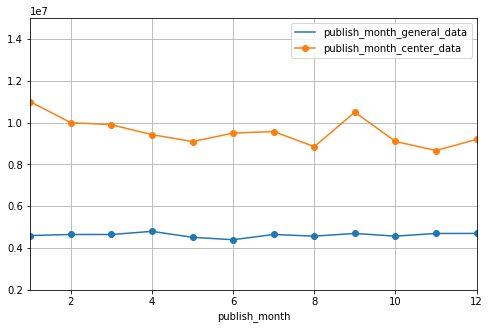

In [120]:
# построение графиков зависимости стоимости квартир от месяца подачи объявления
# в центре города и по всем объявлениям
show_double_line('publish_month', range_value=(1, 12), ylim=(2.0*10**6, 1.5*10**7))

* И в этом случае график также отобразил общую закономерность, что стоимость квартир в центре выше по сравнению со всей базой независимо от месяца подачи объявлений.

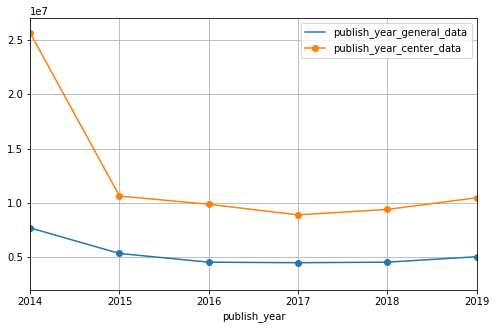

In [121]:
# построение графиков зависимости стоимости квартир от года подачи объявления
# в центре города и по всем объявлениям
show_double_line('publish_year', range_value=(2013, 2020), ylim=(2.0*10**6, 2.7*10**7))

* График также отобразил общую закономерность, что стоимость квартир в центре выше по сравнению со всей базой вне зависимости от года подачи объявлений.
* Выявилась особенность, что падение стоимости квартир в период 2014-2015 годов было более резким по сравнению со всей базой данных и приблизилось к трёхкратному значению.

### Выводы по результатам исследования

* В ходе исследовательского анализа данных были изучены такие параметры как: площадь, цена, число комнат и высота потолков. Распределение этих данных по своей форме было близко к распределению Пуассона. Для параметра высоты потолков после предобработки данных получен медианный всплекс при значениях `2.7`, несмотря на то была предпринята попытка заполнения пропусков по медианным значениям для населенных пунктов `locality_name`.
* Изучен параметр времени продажи квартир по продолжительности периода от момента создания объявления и до его закрытия `days_exposition`. Установлено значение выше которого время продажи квартир может считаться необычно долгим. Оно соствило `512` дней.
* Определены факторы, влияющие на стоимость квартир `last_price`. Для этого были рассмотрены:
    * площадь квартир `total_area`;
    * число комнат `rooms`;
    * удалённость квартир от центра `city_сenters_nearest`;
    * категория этажа, на котором расположены квартиры `floor_cat`;
    * день недели `publish_weekday`, месяц `publish_month` и год `publish_year` размещения объявлений.
* Установлено, что наибольшее влияние на стоимость квартир оказывают их площадь, количество комнат и удалённость от центра. День недели и месяц подачи объявления на стоимость квартир не оказывают практически никакого влияния. При этом стоимость квартир резко снизилась в период 2014-2015 годов и снова начала расти после 2018.
* Самая высокая стоимость квадратного метра квартир отмечена в Санкт-Петербурге (`114833.58`), Пушкине (`103125.37`) и деревне Кудрово (`92473.09`). Самая низкая - в Гатчине (`68745.69`), Всеволжске (`68654.00`) и Выборге (`58141.49`).
* Выделен сегмент квартир в центре города. Его граница установлена значением в `4 км`.
* Для сегмента квартир в центре города таже проведен исследовательский анализ площади, цены, количества комнат и высоты потолков, а также проведено сравнение данных параметров со всей базой. Установлено, что характер распределения похож на характер распределения значений данных параметров для всей базы, но при этом наблюдается общая тенденция к смещению средних и медианных значений правее, что говорит о том, что квартиры в центре города в среднем дороже, имеют большую площадь, большее количество комнат и даже большую высоту потолков. То, что сместились значения медианы и высоты потолков от полученного после предобработки данных медианного всплеска, говорит о том, что для центра города было меньше пропущенных значений по столбцу `ceiling_height` относительно всей базы данных.
* Проведено изучение влияния площади квартир, числа комнат, удалённости от центра и этажа на стоимость квартир теперь уже в центре города и проведено сравнение полученных показателей с данными по всей базе. В целом тенденция сохранилсь и наибольшее влияние на стоимость квартир в центре оказывали площадь квартир и количество комнат. Влияние удалёности квартир от центра нивелировалось, так по сути. исследование и проводилось для самого центра. Влияние этажа на стоимость оказалось минимальным.
* День недели и месяц подачи объявления на стоимость квартир в центре города также не оказывали практически никакого значимого влияния. При этом падение стоимости квартир в период `2014-2015` годов было более ярко выраженным и приблизилось к трёхкратному значению.

## Общие выводы по результатам исследования

1. Полученные в виде архива в файле `real_estate_data.csv` данные сервиса Яндекс.Недвижимость с объявлениями о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет содержали множественные пропущенные значения. В процентном выражении по некоторым столбцам их значние доходило до `88%` по отношению ко всем данным. Причины пропусков были известны и делились на две категории: первая - это пропуски, полученные автоматически на основе обращения к картографическим данным и вторая - пропуски, возникшие из-за непредоставления пользователями соотвествующих данных.
2. Исходя из знаний о природе пропусков и физическом смысле данных, в которых были обнаружены пропуски, произведена попытка их заполнения. В результате пропуски были полностью устранены во второй группе, связанной с непредоставлением данных пользователем. Первая группа поисков была оставлена в исходном виде. Также были обработаны обнаруженные в данных аномальные значения. Для удобства тип данных в столбцах `last_price`, `floor`, `floors_total`  и `balcony` был изменен на целочисленный `int64`, а в `first_day_exposition` на формат времени `datetime64`.  
3. К исходным данным в таблицу были добавлены дополнительные данные, которые потребовались в последующем исследовательском анализе данных, такие как: стоимость квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой и общей площадей, а также соотношение площади кухни к общей площади. Добавлен категориальный признак для этажа квартиры.
4. В ходе исследовательского анализа изучены такие параметры как площадь, цена, число комнат и высота потолков. Определено, что распределение стоимости квартир по данным показателям близко к распределению Пуассона.
5. Изчение времени продаж позволило определить значение, выше которого продолжительность продажи квартир может считаться аномально большой. Оно составило `512` дней.
6. Определены и изучены факторы, влияющие на стоимость квартир. Для изучения взяты: площадь квартир, число комнат, удалённость от центра, категория этажа квартиры, день недели, месяц и год публикации объявления. Созданы графики зависимости цены от данных параметров. Установлено, что наибольшее влияние на цену оказывают площадь квартир, количество комнат в них и удалённость квартир от центра. Категория этажа квартиры, день недели и месяц подачи объявлений на стоимость практически не влияют. По графику зависимости цен на квартиры от года подачи объявлений обнаружено, что в `2014-2015` годах случился полуторакратный спад стоимости квартир, который завершился переходом цен к стабильному состоянию в `2016-2017` и далее после `2018` наметилась тенденция к росту цен.
7. Исследоваение стоимости квадратного метра в различных населенных пунктах позволило установить, что самая высокая стоимость квадратного метра квартир наблюдается в Санкт-Петербурге (`114833.58`), Пушкине (`103125.37`) и деревне Кудрово (`92473.09`). Самая низкая - в Гатчине (`68745.69`), Всеволжске (`68654.00`) и Выборге (`58141.49`).
8. Для Санкт-Петербурга выделен райнон, который можно отнести к центру. Его граница установлена значением в `4 км`.
9. Проведено изучение подвыборки с сгементом квартир в центре и его сравнение с аналогичными значениями, рассчитанными для всей базы данных. Были также изучены такие параметры как площадь, цена, число комнат и высота потолков. Определено, что распределение стоимости квартир по данным показателям близко к распределению Пуассона и что характер распределения похож на характер распределения значений данных параметров для всей базы, но при этом наблюдается общая тенденция к смещению средних и медианных значений правее, что говорит о том, что квартиры в центре города в среднем дороже, имеют большую площадь, большее количество комнат и большую высоту потолков.
10. Изучено влияние площади квартир, числа комнат, удалённости от центра, категории этажа, а также даты размещения объявлений о продаже квартир на их стоимость. Созданые парные графики зависимости данных параметров для сегмента квартир в центре и всей базы объявлений, позволяющие провести наглядное сравнение. Установлено, что так же как и в случае со всей базой объявлений, на стоимость наибольшее влияние оказывает площадь квартир, количество комнат в них, а также фактор удаленности от центра. Для сегмента квартир в центре отмечено более значительное падение стоимости квартир в `2014-2015` годах.